# The Indian Startup Ecosystem Data Analysis for Entrepreneurs.
In this notebook, we will leverage the CRISP-DM (Cross Industry Standard Process for Data Mining) framework to provide a systematic approach for entrepreneurs interested in venturing into the Indian Startup Ecosystem. Our analysis will be based on datasets spanning the period from 2018 to 2021. CRISP-DM (Cross Industry Standard Process for Data Mining framework) is a widely used methodology for guiding the data mining process. It provides a structured approach to tackling data mining projects, ensuring that they are well-planned and executed effectively. CRISP-DM (Cross Industry Standard Process for Data Mining framework) consists of six major phases that are:
1. Business Understanding 
2. Data Understanding 
3. Data Preparation 
4. Modeling 
5. Evaluation 
6. Deployment

The CRISP-DM framework provides a flexible and systematic approach to data mining projects, allowing organizations to effectively manage and derive value from their data assets.By following this structured methodology, we aim to derive valuable insights and support informed decision-making in the startup domain.


## 1.  Business Understanding
### 1.1 Introduction
An entrepreneur is an individual who identifies and creates a business opportunity, takes on the associated risks, and organizes and manages the resources necessary to transform that opportunity into a successful venture. Entrepreneurs play a vital role in driving economic growth and creating new jobs and are instrumental in introducing new products, services, and technologies to the market. Entrepreneurs make significant contributions to startup ecosystems in various ways but a few in which they contribute to the startup ecosystems are:
* Innovation and Disruption: Entrepreneurs identify market gaps, unmet needs, and emerging trends, and develop new products, services, or business models to address them. Their innovations can lead to the creation of entirely new industries, reshape existing markets, and fuel economic growth.
* Job Creation: Startups founded by entrepreneurs are known for their potential to create new jobs. As these ventures grow, they require a diverse range of talent and expertise, leading to job opportunities and employment for individuals. This job creation has a positive impact on the local and national economy, reducing unemployment rates and fostering economic development.
* Economic Growth and Wealth Creation: Successful startups contribute to overall economic growth by generating revenue, attracting investment, and increasing productivity. As startups scale and expand, they generate wealth not only for their founders and investors but also for the wider ecosystem through the multiplier effect. This increased wealth can be reinvested in new ventures, supporting further innovation and growth.
* Knowledge and Skill Transfer: Entrepreneurs bring their expertise, experiences, and specialized knowledge to the startup ecosystem. They often share their insights, mentor aspiring entrepreneurs, and actively participate in startup communities, incubators, and accelerators. This knowledge transfer helps to build a supportive network and foster a culture of entrepreneurship.


### 1.2 Problem Statement
Entrepreneurship and start-up concepts aren’t new in India. When a start-up founder or a business owner initially starts their business, they are accountable for doing several activities from long working hours to juggling between numerous tasks.  Entrepreneurship is a challenging journey that requires hard work, dedication, and persistence.  In this startup era, the Indian government is doing maximum efforts to encourages entrepreneurs through monetary and non-monetory benefits. Although the government is supporting startup entrepreneurs still there are numerous bottlenecks that exist, some are controllable and others are uncontrollable in the hands of entrepreneurs therefore identification of those issues could be the first step. 

Some issues identified by theofficepass.com are as follows: Financing, Lack of Planning, Hiring the right talent, Effective marketing within a limited budget, Self-doubt and uncertainty, Dealing with criticism, Attractive Customers, Making Decisions, Time Management, Office Infrastructure, Competition, Scaling the Business, Marketing and sales, Legal and Regulatory Compliance and Managing Cash Flow. Also, EPRA International Journal of Multidisciplinary Research (IJMR) outlined 3 major challenges faced by entrepreneurs as:

 1.2.1 Financial challenges:
1. Collateral issues:- startup firms face problem of procuring loan, main reason for this is they lack security as those are formed with less initial capital.
2. Delay in loan processing:- Rigid formalities of sanctioning loan leads to delay in working of startups. 

 1.2.2 Marketing challenges:
1. Lack of market research: - research about the market to understand the segments and micro and macro environment is necessary for succeed in competition.
2. Pilot testing: - testing the product or service in selected small portion of the target market is better before commercialization.
3. Peer competition: - competition from rival firms is a big challenge for survival and growth of the startups.

 1.2.3 Other challenges:
1. Tax burden: - startups which are recognized under the startups India scheme only gets tax holiday for 3 years but after that they need to pay tax.
2. Technology up gradation:- continuous changes in technology need more funds its difficult for startups to indulge continuous improvements.
3. Change in tastes and preferences:- macro economic factors like changes in tastes and preferences of customers, demand for substitutes impact on firms.
4. Inflation rates and bank rates :- increase inflation rates can impact of heavy interest rates for procuring loans by the startups.
5. Regulations:- huge legal formalities makes the procedures delay and leads to interest loss for the firms.
6. Finding suitable employees:- human resources is scares, so recruiting and selecting right person for the right job plays vital role.


##### References
Data Understanding
https://www.ibm.com/docs/en/spss-modeler/saas?topic=dm-crisp-help-overview

2022 EPRA International Journal of Multidisciplinary Research (IJMR) - Peer Reviewed Journal | www.eprajournals.com | Journal DOI URL: https://doi.org/10.36713/epra2013

https://www.neusourcestartup.com/startupindia/startup-problems-india-facing

https://www.theofficepass.com/toppings/common-problems-entrepreneurs-face-starting-startup-india.html


 




### 1.3 RESEARCH TOPIC

Analyzing the relationship between funding amount and other factors for market penetration of the Indian Startup Ecosystem: An entrepreneur decision-making key.

### 1.4 AIM OF THE PROJECT

To provide insight into the factors that significantly impact the amount received by startups (factors such as Sector,  location, and the Funding stage). This is to inform our team on what sectors to look at and tailor what they want to do to services that get the most funding. We also seek to help them find strategic location(s) to look at when starting up, and also what stage they should go seek funding. 

## 2. Data Understanding
Next is the Data Understanding phase. Adding to the foundation of Business Understanding, it drives the focus to identify, collect, and analyze the data sets that can help you accomplish the project goals. This phase also has four tasks:
* Collect initial data: The datasets were acquired from three sources. The 2021 & 2020 datasets were retrieved from an SQL database (DapDB), the 2019 from microsoft onedrive and the 2018 dataset from a github repository.
* Describe data: Examine the data and document its surface properties like data format, number of records, or field identities.
* Explore data: Dig deeper into the data. Query it, visualize it, and identify relationships among the data.
* Verify data quality: How clean/dirty is the data? Document any quality issues.

To perform this task we would look at 
1. Loading datasets
2. Preview all the Dataset loaded
3. Data Assessment


### 2.1 Loading of the Datasets 

In [224]:
# Load the libraries/modules

# For data manipulation and cleaning
import pandas as pd # a tool for data analysis and manipulation.
import numpy as np # a tool for numerical computations.

# For data visualizations
import matplotlib.pyplot as plt # a tool for ploting graphs/charts.
import seaborn as sns # a tool built on matplotlib for plotting graphs/charts.

# Other supporting libraries
import pyodbc #  helps in making access to SQL Server database simple.
from dotenv import dotenv_values # helps to get login credential to the database.

import warnings # Hiding not too major the warnings.
import statsmodels.api as sm
from statsmodels.formula.api import ols # for statistical analysis



warnings.filterwarnings('ignore')


In [225]:
# Create an environment to store sentitive information
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [226]:
# Connecting to the Database
connection = pyodbc.connect(connection_string)

In [227]:
# Loading the data in pandas to work on.
query_1 ='SELECT * FROM dbo.LP1_startup_funding2020'
query_2 ='SELECT * FROM dbo.LP1_startup_funding2021'

data_2018 = pd.read_csv('startup_funding2018.csv')
data_2019 = pd.read_csv('startup_funding2019.csv')

# data_2019 = pd.read_csv(r'C:\Users\etnketiah\Documents\Azubi\startup_funding2019.csv')
# data_2018 = pd.read_csv(r'C:\Users\etnketiah\Documents\Azubi\startup_funding2018.csv')
data_2020 = pd.read_sql(query_1, connection)
data_2021 = pd.read_sql(query_2, connection)

### 2.2 Preview all the Dataset loaded
DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). 

In [228]:
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [229]:
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [230]:
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [231]:
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


#### 2.3 Get the shape of the Datasets
The shape property returns a tuple representing the dimensionality of the DataFrame. The format of shape would be (rows, columns).

In [232]:
data_2018.shape, data_2019.shape, data_2020.shape, data_2021.shape

((526, 6), (89, 9), (1055, 10), (1209, 9))

#### 2.4 Get information on the datasets
This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. Parameters. verbosebool, optional.

In [233]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [234]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [235]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [236]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


#### 2.5 Check for Duplicates

In [237]:
data_2018[data_2018.duplicated()]

,Company Name,Industry,Round/Series,Amount,Location,About Company
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


In [238]:
data_2019[data_2019.duplicated()]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage


In [239]:
data_2020[data_2020.duplicated()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
205,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
362,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None


In [240]:
data_2021[data_2021.duplicated()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None
243,Trinkerr,2021.0,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,$6600000,Series A
244,Zorro,2021.0,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",$32000000,Seed
245,Ultraviolette,2021.0,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",$150000000,Series C
246,NephroPlus,2009.0,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,$24000000,Series E
247,Unremot,2020.0,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,$700000,Seed


In [241]:
data_2018.duplicated().sum()

1

In [242]:
data_2019.duplicated().sum()

0

In [243]:
data_2020.duplicated().sum()

3

In [244]:
data_2021.duplicated().sum()

19

#### 2.6 Check for Missing values

In [245]:
data_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [246]:
data_2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [247]:
data_2020.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [248]:
data_2021.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

#### 2.7 Preview each column to understand the Datasets

2018 dataset

In [249]:
data_2018['Company Name'].value_counts()

TheCollegeFever                      2
NIRAMAI Health Analytix              1
Drivezy                              1
Hush - Speak Up. Make Work Better    1
The Souled Store                     1
                                    ..
Qandle                               1
iChamp                               1
Credy                                1
Survaider                            1
Netmeds                              1
Name: Company Name, Length: 525, dtype: int64

In [250]:
data_2018['Industry'].value_counts()

—                                              30
Financial Services                             15
Education                                       8
Information Technology                          7
Health Care, Hospital                           5
                                               ..
Education, Gaming, Training                     1
Automotive, Search Engine, Service Industry     1
Wealth Management                               1
B2B, Farming, Marketplace                       1
Biotechnology, Health Care, Pharmaceutical      1
Name: Industry, Length: 405, dtype: int64

In [251]:
data_2018['Round/Series'].value_counts()

Seed                                                                                                       280
Series A                                                                                                    73
Angel                                                                                                       37
Venture - Series Unknown                                                                                    37
Series B                                                                                                    20
Series C                                                                                                    16
Debt Financing                                                                                              13
Private Equity                                                                                              10
Corporate Round                                                                                              8
P

In [252]:
data_2018['Amount'].value_counts()

—              148
1000000         24
500000          13
2000000         12
₹50,000,000      9
              ... 
2200000          1
1200000          1
$15,000          1
$1,041,000       1
35000000         1
Name: Amount, Length: 198, dtype: int64

In [253]:
data_2018['Location'].value_counts()

Bangalore, Karnataka, India         102
Mumbai, Maharashtra, India           94
Bengaluru, Karnataka, India          55
Gurgaon, Haryana, India              52
New Delhi, Delhi, India              51
Pune, Maharashtra, India             20
Chennai, Tamil Nadu, India           19
Hyderabad, Andhra Pradesh, India     18
Delhi, Delhi, India                  16
Noida, Uttar Pradesh, India          15
Haryana, Haryana, India              11
Jaipur, Rajasthan, India              9
Ahmedabad, Gujarat, India             6
Kolkata, West Bengal, India           6
Bangalore City, Karnataka, India      5
Indore, Madhya Pradesh, India         4
India, Asia                           4
Kormangala, Karnataka, India          3
Ghaziabad, Uttar Pradesh, India       2
Kochi, Kerala, India                  2
Bhopal, Madhya Pradesh, India         2
Thane, Maharashtra, India             2
Jodhpur, Rajasthan, India             1
Powai, Assam, India                   1
Andheri, Maharashtra, India           1


In [254]:
data_2018['About Company'].value_counts()

TheCollegeFever is a hub for fun, fiesta and frolic of Colleges.                                                                    2
Algorithmic trading platform.                                                                                                       2
Finwego partners with Small and Medium Businesses in India to offer convenient and responsible credit to their employees            1
Drivezy is India's largest vehicle sharing platform which helps people turn their vehicles into earning members of their family.    1
Enabling diversity of opinions in organizations                                                                                     1
                                                                                                                                   ..
iChamp is an e education innovation product from RNM E-Services Pvt Ltd.                                                            1
Credy is a fintech platform that connects borrowers seeking ca

2019 dataset

In [255]:
data_2019['Company/Brand'].value_counts()

Kratikal            2
Licious             2
Bombay Shaving      1
KredX               1
Euler Motors        1
                   ..
HungerBox           1
Fireflies .ai       1
Toffee Insurance    1
Seekify             1
Ess Kay Fincorp     1
Name: Company/Brand, Length: 87, dtype: int64

In [256]:
data_2019['Founded'].value_counts()

2015.0    12
2014.0     8
2016.0     7
2013.0     6
2018.0     6
2017.0     5
2010.0     4
2019.0     4
2011.0     3
2012.0     3
2004.0     1
2008.0     1
Name: Founded, dtype: int64

In [257]:
data_2019['HeadQuarter'].value_counts()

Bangalore        21
Mumbai           12
Delhi            10
Noida             5
Gurugram          5
Chennai           4
Pune              2
Jaipur            2
Telangana         1
Ahmedabad         1
Haryana           1
Chandigarh        1
New Delhi         1
Surat             1
Uttar pradesh     1
Hyderabad         1
Rajasthan         1
Name: HeadQuarter, dtype: int64

In [258]:
data_2019['Sector'].value_counts()

Edtech                          7
Fintech                         5
AgriTech                        4
Technology                      4
SaaS                            4
Automobile                      3
E-commerce                      3
Logistics                       3
Food                            2
Foodtech                        2
Accomodation                    2
Automotive tech                 2
IoT                             2
AI                              2
E-marketplace                   2
Ecommerce                       1
Cybersecurity                   1
Mutual Funds                    1
Food & tech                     1
Legal tech                      1
Sports                          1
B2B Supply Chain                1
Healthtech                      1
Yoga & wellness                 1
Virtual Banking                 1
Transportation                  1
Transport & Rentals             1
Marketing & Customer loyalty    1
Infratech                       1
Hospitality   

In [259]:
data_2019['What it does'].value_counts()

Online meat shop                                                                                     2
Provides a range of male grooming products                                                           1
Online financial marketplace for customized rate quotes on loans and investment products in India    1
It is into mother and baby care-focused consumer goods                                               1
It is offering mobility as a service                                                                 1
                                                                                                    ..
Developer of an artificial intelligence-powered assistant for businesses                             1
Provides variety of insurance plans and policies                                                     1
Customer Experience (CX) Automation platform                                                         1
It solves inadequacies in the healthcare delivery system through technolo

In [260]:
data_2019['Founders'].value_counts()

Vivek Gupta, Abhay Hanjura        2
Shantanu Deshpande                1
Manish Kumar                      1
Saurav Kumar                      1
Visakh Sasikumar                  1
                                 ..
Nishant Jain, Rohan Kumar         1
Arihant Jain, Ajeet Kushwaha      1
Tushar Kumar, Prashant Singh      1
Dhiraj Naubhar, Dheeraj Bansal    1
Rajendra Setia                    1
Name: Founders, Length: 85, dtype: int64

In [261]:
data_2019['Investor'].value_counts()

Undisclosed                                            3
Trifecta Capital                                       2
Sixth Sense Ventures                                   1
Sunil Gavaskar                                         1
Saama Capital, DSG Consumer Partners                   1
                                                      ..
Paytm, Asian VC fund NPTK, Sabre Partners, Neoplux.    1
Canaan Partners                                        1
IVM Intersurer                                         1
Sequoia Capita                                         1
TPG, Norwest Venture Partners, Evolvence India         1
Name: Investor, Length: 86, dtype: int64

In [262]:
data_2019['Amount($)'].value_counts()

Undisclosed     12
$5,000,000       6
$1,500,000       4
$6,000,000       4
$1,000,000       4
$30,000,000      3
$20,000,000      3
$50,000,000      3
$4,000,000       3
$5,500,000       3
$26,000,000      2
$2,000,000       2
$12,000,000      2
$100,000         2
$5,700,000       1
$693,000,000     1
$4,800,000       1
$120,000,000     1
$311,000,000     1
$6,800,000       1
$36,000,000      1
$2,800,000       1
$220,000         1
$600,000         1
$7,000,000       1
$2,100,000       1
$70,000,000      1
$60,000,000      1
$8,000,000       1
$25,000,000      1
$6,300,000       1
$100,000,000     1
$11,000,000      1
$28,000,000      1
$275,000,000     1
$22,000,000      1
$140,500         1
$540,000,000     1
$15,000,000      1
$182,700         1
$15,500,000      1
$400,000         1
$2,500,000       1
$140,000         1
$230,000,000     1
$49,400,000      1
$32,000,000      1
$150,000,000     1
$150,000         1
$33,000,000      1
Name: Amount($), dtype: int64

In [263]:
data_2019['Stage'].value_counts()

Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: Stage, dtype: int64

2020 dataset

In [264]:
data_2020['Company_Brand'].value_counts()

Nykaa          6
Zomato         6
Rebel Foods    4
Servify        4
Vedantu        4
              ..
Odwen          1
Fasal          1
Trukky         1
Specsmakers    1
Pando          1
Name: Company_Brand, Length: 905, dtype: int64

In [265]:
data_2020['Founded'].value_counts()

2015.0    136
2018.0    123
2019.0    104
2016.0    103
2017.0     92
2014.0     72
2020.0     42
2012.0     40
2013.0     36
2011.0     31
2008.0     18
2010.0     16
2009.0      7
2006.0      6
2007.0      4
1995.0      2
1982.0      1
1998.0      1
1978.0      1
1999.0      1
1994.0      1
2005.0      1
1973.0      1
2002.0      1
2004.0      1
2001.0      1
Name: Founded, dtype: int64

In [266]:
data_2020['HeadQuarter'].value_counts()

Bangalore                                                   317
Mumbai                                                      165
Gurugram                                                     79
Delhi                                                        62
Chennai                                                      43
                                                           ... 
Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom      1
Shanghai, China                                               1
Jiaxing, Zhejiang, China                                      1
Rajastan                                                      1
Sydney, New South Wales, Australia                            1
Name: HeadQuarter, Length: 77, dtype: int64

In [267]:
data_2020['Sector'].value_counts()

Fintech                  80
Edtech                   67
FinTech                  51
EdTech                   40
E-commerce               33
                         ..
Jewellery                 1
AR startup                1
HR Tech startup           1
Automotive Startup        1
Automobile Technology     1
Name: Sector, Length: 302, dtype: int64

In [268]:
data_2020['What_it_does'].value_counts()

Provides online learning classes                                                                                            4
Onine learning platform                                                                                                     4
Offers a variety of bikes and scooters that can be rented on a subscription basis                                           3
Offers techno logistics solutions                                                                                           3
A finance lender to SMEs                                                                                                    3
                                                                                                                           ..
Check your latest Credit Score and get your Credit Report online in India for Free                                          1
A leader in crafting stylish, high-quality, eyewear at affordable prices.                                             

In [269]:
data_2020['Founders'].value_counts()

Falguni Nayar                                                6
Byju Raveendran                                              6
Mukesh Ambani                                                4
Saurabh Saxena, Pulkit Jain, Anand Prakash, Vamsi Krishna    4
Sreevathsa Prabhakar                                         4
                                                            ..
Damien Toledo, Jim Bugwadia, Ritesh Patel                    1
Anmol Singh Jaggi                                            1
Dhruv Sawhney, Vivek Sahi, Sunny Bagla                       1
Apurv Agrawal, Kanika Jain, Rishabh Ladha, Vikas Gulati      1
Jayakrishnan, Abhijeet Manohar                               1
Name: Founders, Length: 927, dtype: int64

In [270]:
data_2020['Investor'].value_counts()

Venture Catalysts                             20
Angel investors                               12
Mumbai Angels Network                         12
Inflection Point Ventures                     11
Undisclosed                                   10
                                              ..
Mumbai Angels.                                 1
Ramesh Srinivasan, Amazon                      1
Ashok Leyland, V Lakshmi Narayanan             1
Ranjit Punja, R Sudarshan, Gowri Mukherjee     1
SIG Global India Fund LLP.                     1
Name: Investor, Length: 848, dtype: int64

In [271]:
data_2020['Amount'].value_counts()

1000000.0     53
2000000.0     39
3000000.0     27
5000000.0     24
500000.0      22
              ..
2879000.0      1
26500000.0     1
351000.0       1
46761000.0     1
8043000.0      1
Name: Amount, Length: 300, dtype: int64

In [272]:
data_2020['Stage'].value_counts()

Series A                 96
Seed                     80
Seed Round               69
Series B                 57
Pre series A             54
Pre-series A             53
Series C                 50
Series D                 22
Debt                     18
Pre Series A             12
Pre-seed                 11
Seed round                9
Series E                  6
Bridge                    6
Series F                  4
Pre-series B              4
Angel Round               4
Pre seed round            4
Pre-seed Round            2
Pre series B              2
Pre-Seed                  2
Seed Funding              2
Series B2                 2
Pre-series C              2
Seed funding              2
Pre-Series B              2
Seed Round & Series A     1
Series C, D               1
Mid series                1
Series D1                 1
Seed Investment           1
Pre series C              1
Pre-series                1
Bridge Round              1
Series H                  1
Seed A              

In [273]:
data_2020['column10'].value_counts()

Pre-Seed      1
Seed Round    1
Name: column10, dtype: int64

2021 dataset

In [274]:
data_2021['Company_Brand'].value_counts()

BharatPe            8
BYJU'S              4
CoinSwitch Kuber    3
Delhivery           3
Slice               3
                   ..
MYFITNESS           1
I am Love           1
Gumlet              1
Eloelo              1
WeRize              1
Name: Company_Brand, Length: 1033, dtype: int64

In [275]:
data_2021['Founded'].value_counts()

2020.0    237
2019.0    177
2018.0    143
2015.0    129
2016.0    118
2017.0    112
2021.0     76
2014.0     57
2011.0     34
2012.0     31
2013.0     22
2008.0     15
2010.0     14
2009.0      9
2007.0      6
2000.0      6
2006.0      3
2002.0      2
1994.0      2
1989.0      2
1999.0      2
1998.0      2
2004.0      2
1993.0      1
1978.0      1
2003.0      1
1991.0      1
1984.0      1
2005.0      1
1963.0      1
Name: Founded, dtype: int64

In [276]:
data_2021['HeadQuarter'].value_counts()

Bangalore      426
Mumbai         203
Gurugram       155
New Delhi      144
Pune            47
              ... 
Roorkee          1
Ambernath        1
Panchkula        1
Andheri          1
Gandhinagar      1
Name: HeadQuarter, Length: 70, dtype: int64

In [277]:
data_2021['Sector'].value_counts()

FinTech                   122
EdTech                    102
Financial Services         61
E-commerce                 37
Food & Beverages           37
                         ... 
Manufacturing startup       1
Cryptocurrency              1
Vehicle repair startup      1
Advisory firm               1
Staffing & Recruiting       1
Name: Sector, Length: 254, dtype: int64

In [278]:
data_2021['What_it_does'].value_counts()

BharatPe develops a QR code-based payment app for offline retailers and businesses.                                                        4
BYJU'S is an educational technology company that develops personalized learning programs for K-12 students.                                4
Ruptok fintech Pvt. Ltd. is an online gold loan service provider , with attractive interests rate .                                        3
KreditBee is a digital lending platform developed to assist young professionals with their personal finances.                              2
A real money game app specializing in trivia games                                                                                         2
                                                                                                                                          ..
Pocket Aces is a digital entertainment company focused on mobile video.                                                                    1
An online-fir

In [279]:
data_2021['Founders'].value_counts()

Ashneer Grover, Shashvat Nakrani    7
Byju Raveendran, Divya Gokulnath    5
Bhavish Aggarwal                    4
Ritesh Agarwal                      4
Nirmit Parikh                       3
                                   ..
Sneha Priya, Pranavan S             1
Lalit, Sarita Das                   1
Vidur Maheswari                     1
Mohit, Rahul Yadav                  1
Vishal Chopra, Himanshu Gupta       1
Name: Founders, Length: 1095, dtype: int64

In [280]:
data_2021['Investor'].value_counts()

Inflection Point Ventures          24
Tiger Global                       11
Venture Catalysts                  11
Elevation Capital                   7
Titan Capital                       6
                                   ..
Siana Capital                       1
DST Global, General Catalyst        1
InnoVen Capital, InnoVen Capita     1
3one4 Capital, DSP Group            1
3one4 Capital, Kalaari Capital      1
Name: Investor, Length: 937, dtype: int64

In [281]:
data_2021['Amount'].value_counts()

$Undisclosed    73
$1000000        52
Undisclosed     43
$2000000        40
$1,000,000      33
                ..
$900,000         1
$250,000         1
$16,000,000      1
$280,000,000     1
$55000000        1
Name: Amount, Length: 278, dtype: int64

In [282]:
data_2021['Stage'].value_counts()

Seed             246
Pre-series A     157
Series A         126
Series B          49
Pre-seed          47
Series C          45
Debt              27
Series D          21
Series E          18
Pre-series B      10
Series F           6
Pre-series A1      4
Pre-series         2
$300000            2
Series H           2
Series G           2
Bridge             2
$1200000           2
Series A+          1
Series F2          1
Series B3          1
PE                 1
Series F1          1
Seed+              1
Early seed         1
Series D1          1
$6000000           1
$1000000           1
Seies A            1
Series A2          1
Series I           1
Name: Stage, dtype: int64

#### 2.8 DATA ASSESSMENT

DATA ASSESSMENT AFTER PREVIEWING DATASETS

After gathering data from  the sources mentioned above, we assessed each dataset for its quality issues. During our exploration of the datasets (EDA), we identified several data quality issues, which include:
* Inconsistent and missing columns: 
  Some datasets have inconsistent column structures, with missing columns in certain cases.

* Missing columns and duplicates in the datasets: 
  Specifically, the 2018 dataset is missing additional columns that are present in other datasets.

* Inconsistent values and currencies in the Amount column: 
  The Amount column contains inconsistent values and different currencies.

* Inconsistent values in the Stage column: 
  The Stage column exhibits inconsistent values across all datasets, which hampers uniform analysis.

* Missing values: 
  Some datasets contain missing values, which need to be addressed for a complete and reliable analysis.

* Duplicated rows: 
  Most of the datasets had information in certain rows duplicated 
  

### HYPOTHESIS

##### Null Hypothesis (H0)
There is no significant association between the funding amount and the other factors such as sector,location,and the funding stage.

##### Alternate Hypothesis (H1)
There is a significant association between funding amount and other factors such as sector, location, and funding stage.

##### Our Research Questions

1. What is the average amount invested across all the years?

2. What are the top10 sectors that got the most funding over the period?

3. What top 10 companies under Fintech got the most funding?

4. Does location affect the funding amount given to the top 10 sectors?

5. Does the stage affect the amount of funding given?

6. Who are the top investors?

7. What is the funding trend in the Indian startup ecosystem between 2018 to 2021

    




...

## 3. Data Preparation
A common rule of thumb is that 80% of the project is data preparation. This phase, which is often referred to as “data munging”, prepares the final data set(s) for modeling. It has five tasks:

* Select data
* Clean data
* Construct data
* Integrate data
* Format data
    
: Determine which data sets will be used and document reasons for inclusion/exclusion.


: Often this is the lengthiest task. Without it, you’ll likely fall victim to garbage-in, garbage-out. A common practice during this task is to correct, impute, or remove erroneous values.


: Derive new attributes that will be helpful. For example, derive someone’s body mass index from height and weight fields.


: Create new data sets by combining data from multiple sources.


: Re-format data as necessary. For example, you might convert string values that store numbers to numeric values so that you can perform mathematical operations.


### 3.1 Data Cleaning

### 2018

#### Cleaning of Industry column of 2018
Key issues identified
* There were multiple entries separated by comma

Aprroach to Clean the column

We created a mapping Dictionary to help us group all the multiple entries into one Industry and created a new column called 'Sector' where we stored all the single industry we created.

In [283]:
# create a mapping dictionary to create new sector from Industry in 2018 dataset
mapping_dict = {

"Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing":"Media and Marketing",
"Agriculture, Farming":"Agriculture",
"Credit, Financial Services, Lending, Marketplace":"Fintech",
"Financial Services, FinTech":"Fintech",
"E-Commerce Platforms, Retail, SaaS":"Ecommerce",
"Cloud Infrastructure, PaaS, SaaS":"Saas",
"Internet, Leisure, Marketplace":"Ecommerce",
"Market Research":"AI",
"Information Services, Information Technology":"IT",
"Mobile Payments":"Fintech",
"B2B, Shoes":"Ecommerce",
"Internet":"Saas",
"Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat":"Saas",
"Food Delivery":"Delivery Services",
"Industrial Automation":"Automation",
"Automotive, Search Engine, Service Industry":"Car Rental",
"Finance, Internet, Travel":"Fintech",
"Accounting, Business Information Systems, Business Travel, Finance, SaaS":"Fintech",
"Artificial Intelligence, Product Search, SaaS, Service Industry, Software":"AI",
"Internet of Things, Waste Management":"Waste management",
"Air Transportation, Freight Service, Logistics, Marine Transportation":"Transport",
"Financial Services":"Fintech",
"Food and Beverage":"Food and Beverage",
"Autonomous Vehicles":"Car Rental",
"Enterprise Software, Health Care, Hospital, Parenting, Personal Health, SaaS":"HealthCare",
"Agriculture, Analytics, Big Data, Farming":"AgricTech",
"Logistics, Supply Chain Management":"E-Logistics",
"Financial Services, Lending":"Fintech",
"Automotive, Marketplace, Online Portals":"Ecommerce",
"Artificial Intelligence":"AI",
"Internet of Things, Telecommunications":"Iot",
"Insurance":"Insurance",
"Financial Services":"Fintech",
"Information Technology, Logistics, Supply Chain Management":"E-Logistics",
"Blockchain, Developer Tools, Enterprise Software":"Saas",
"Industrial Automation, Logistics, Supply Chain Management":"Logistics",
"Food and Beverage, Food Delivery, Snack Food":"Food and Beverage",
"Education":"Education",
"E-Commerce, Fashion, Jewelry, Retail":"Ecommerce",
"Financial Services":"Fintech",
"Renewable Energy":"Renewable Energy",
"E-Learning, Education":"EdTech",
"Clean Energy, CleanTech, Laundry and Dry-cleaning":"Clean Tech",
"E-Commerce, Fashion, Mobile":"Ecommerce",
"Apps, Messaging, Navigation, Public Safety":"Saas",
"Transportation":"Transport",
"Financial Services, Lending":"Fintech",
"Fitness, Health Care, Wellness":"HealthCare",
"Artificial Intelligence, Machine Learning, SaaS, Virtual Assistant":"AI",
"Hospitality":"Accomodation",
"Food and Beverage, Tea":"Food and Beverage",
"Media and Entertainment, News, Outdoors":"Media and Marketing",
"Broadcasting, Media and Entertainment, Music, Music Streaming, Video, Video Streaming":"Media and Marketing",
"B2B, Information Services, Information Technology":"Ecommerce",
"EdTech, Education, Enterprise Software, Peer to Peer":"EdTech",
"Health Care, Medical":"HealthCare",
"E-Commerce":"Ecommerce",
"Health Care, Hospital, Wellness":"HealthCare",
"Media and Marketing":"Media and Marketing",
"Sports":"Sports",
"Big Data, Consumer Lending, FinTech":"Fintech",
"Cloud Computing, Computer, Semiconductor":"AI",
"Health Care, Medical, Pharmaceutical":"HealthCare",
"Food Processing, Retail":"Food and Beverage",
"Trading Platform":"Fintech",
"Consumer Goods, Lifestyle, Men's":"fashion",
"Wellness":"HealthCare",
"Education":"Education",
"Food and Beverage, Food Processing, Nutrition":"Food and Beverage",
"Fashion":"fashion",
"Automotive, Electric Vehicle, Energy Storage":"Automotive",
"Consulting, Retail, Social":"Real Estate",
"Biotechnology, Life Science, Pharmaceutical, Product Research":"HealthCare",
"Health Care":"HealthCare",
"Credit, Financial Services, FinTech, Personal Finance":"Fintech",
"Internet":"Digital Media",
"Communities, Coworking, Incubators":"Startup Hub",
"Consumer, Financial Services, FinTech":"Fintech",
"Consumer Applications, Information Services, Location Based Services, Virtual Assistant":"AI",
"Mobile, Mobile Apps, Personalization, Test and Measurement, Web Apps":"IT",
"Education, Financial Services, FinTech":"Fintech",
"Advertising, Consulting, Digital Marketing":"Ad-Tech",
"Marketplace, Real Estate, Rental Property":"Real Estate",
"Health Care":"HealthCare",
"E-Learning, Internet, Video Games":"EdTech",
"Artificial Intelligence, Cloud Computing, Video":"AI",
"Health Care, Information Technology":"HealthCare",
"Aerospace":"AI",
"E-Commerce, Fashion, Lifestyle":"Art and Design",
"Artificial Intelligence, Business Intelligence, Industrial Automation, Machine Learning":"AI",
"Insurance":"Insurance",
"E-Commerce":"Automotive and Rentals",
"Home Decor, Home Improvement, Home Renovation, Home Services, Interior Design, Smart Home":"Art and Design",
"EdTech, Education, Information Services, SaaS":"EdTech",
"Energy, Solar":"Renewable Energy",
"B2B, Biometrics, Cyber Security, Fraud Detection, SaaS, Security":"Saas",
"Artificial Intelligence, Social":"AI",
"Logistics, Transportation, Travel":"Logistics",
"Digital Marketing, SEM, SEO, Web Development":"Digital Marketing",
"Health Care, Hospital, Medical":"HealthCare",
"Finance, Financial Services":"Finance",
"Food Delivery, Food Processing, Internet":"Food and Beverage",
"E-Commerce, Food and Beverage, Internet":"Food and Beverage",
"Fitness, Food and Beverage, Health Care, Nutrition":"Food and Beverage",
"EdTech, Education, Knowledge Management":"EdTech",
"Finance":"Finance",
"Financial Services":"Fintech",
"Apps, Beauty, Consumer, Retail":"Beauty",
"Creative Agency, Crowdfunding, EdTech, Health Care, Internet, Medical, Non Profit, Personal Health":"Startup Hub",
"Consumer Lending, Financial Services, FinTech, Insurance, Lending, Mobile Payments, Payments, Wealth Management":"Fintech",
"E-Learning, Education, Higher Education":"EdTech",
"Health Care, Medical, Pharmaceutical":"HealthCare",
"Health Diagnostics":"HealthCare",
"EdTech, Education":"EdTech",
"Financial Services, SaaS, Security":"Saas",
"Banking, Finance, Financial Services, Non Profit":"Finance",
"Finance, Financial Services":"Fintech",
"B2B, E-Commerce, Mobile":"Ecommerce",
"Automotive, Electric Vehicle, Renewable Energy":"Automation",
"E-Learning":"EdTech",
"Embedded Systems, Health Care, Medical, Product Research":"HealthCare",
"Retail":"Retail",
"Apps, E-Commerce, Internet":"Ecommerce",
"Advertising, Human Resources, Marketing":"Media and Marketing",
"Beauty, Fitness, Home Services, Internet":"Beauty & wellness",
"Health Care, Medical Device, Public Safety":"HealthCare",
"Food Delivery, Online Portals, Restaurants":"Food and Beverage",
"AgTech, B2B, Supply Chain Management":"AgriTech",
"Credit Cards, Finance, Mobile Apps, Mobile Payments, Payments":"Fintech",
"Software":"AI",
"EdTech, Education, Higher Education, Secondary Education":"EdTech",
"Manufacturing, Retail":"Retail",
"Manufacturing":"Automation",
"Information Services, Information Technology, InsurTech":"Insurance",
"Consumer Lending, FinTech":"Finance",
"Internet, Social Network, TV":"Social Network",
"Beauty, Health Care":"HealthCare",
"Hospital":"Ecommerce",
"Events":"Media Tech",
"3D Printing, Manufacturing, Product Design":"Saas",
"Automotive":"Automation",
"Automotive, Retail":"Ecommerce",
"Apps, Audio":"Digital Media",
"Automotive, E-Commerce":"E- Rental",
"Digital Entertainment, Fantasy Sports, Sports":"Sports",
"E-Learning, EdTech, Education":"EdTech",
"Fintech":"Fintech",
"Funding Platform, Incubators, Non Profit":"Fintech",
"Hospitality, Hotel, Leisure, Travel":"Hospitality",
"Classifieds, Internet, Marketplace, Rental Property":"Ecommerce",
"Sports":"Sports",
"Banking, E-Learning, Trading Platform":"EdTech",
"E-Commerce, Mobile, Retail":"Ecommerce",
"Food and Beverage":"Food and Beverage",
"Artificial Intelligence, Information Technology":"AI",
"Enterprise Resource Planning (ERP), Information Services, Information Technology, Real Estate":"Real Estate",
"Banking, Finance, Financial Services":"Finance",
"Software":"Software Company",
"Information Services, Information Technology":"Finance",
"Audio, Mobile, Tourism, Travel":"Hospitality",
"Energy, Energy Storage, Infrastructure":"Energy Storage",
"Artificial Intelligence":"AI",
"Government, Information Technology, Software":"Technology",
"Information Technology":"Technology",
"Education, Information Technology, Internet, Mobile, Software":"EdTech",
"Consumer Lending, Financial Services, Lending, Personal Finance":"Fintech",
"Digital Media, Internet, Media and Entertainment, Online Portals, Social Media":"Digital Tech",
"Business Intelligence, Customer Service, Market Research, SaaS":"Saas",
"Credit, Financial Services, FinTech, Lending":"Finance",
"E-Learning":"Education",
"Software":"HR-Tech",
"Children, Education, Parenting":"EdTech",
"Automotive, Battery, Energy, Energy Storage":"Automobile",
"E-Commerce, Mobile, Sharing Economy":"Ecommerce",
"Gaming":"Gaming",
"Food Delivery, Organic, Organic Food":"Food and Beverage",
"Mobile":"Saas",
"Rental":"Real Estate",
"Travel":"Finance",
"Consumer":"Hospitality",
"B2B, Farming, Marketplace":"AgriTech",
"Technology":"Technology",
"Wealth Management":"Finance",
"Biotechnology":"BioTech",
"Education, Gaming, Training":"EdTech",
"Veterinary":"HealthCare",
"Internet, Mobile, Social Entrepreneurship, Telecommunications, Wireless":"Telecommunication",
"Health Care, Hospital, Supply Chain Management":"Ecommerce",
"Finance, Financial Services":"Fintech",
"Financial Services, Lending":"Finance",
"Tourism, Travel":"Hospitality",
"Education":"Education",
"Hospitality, Real Estate":"Hospitality",
"Finance":"Finance",
"Market Research":"Robotics",
"Tourism, Travel":"Ecommerce",
"Digital Media, EBooks, Publishing, Reading Apps":"Digital Media",
"Consumer Electronics, Embedded Systems, Hardware, Smart Building, Software":"Robotics",
"Food and Beverage, Food Processing":"Food and Beverage",
"Internet, Marketplace, Shopping":"Ecommerce",
"Analytics, Computer Vision, Enterprise Software, Machine Learning, Natural Language Processing, Speech Recognition":"Education",
"Facilities Support Services":"Startup Hub",
"Automotive, Electric Vehicle, Energy":"Renewable Energy",
"Health Care, Health Diagnostics, Predictive Analytics":"HealthCare",
"Cloud Computing, Computer, SaaS, Software":"VR  & Saas",
"Fashion, Lifestyle, Retail":"fashion",
"Education":"Education",
"Medical":"HealthCare",
"Music Streaming":"Entertainment",
"Finance, Impact Investing, Internet":"Fintech",
"Automation":"Automation",
"Internet, Social Entrepreneurship":"Entrepreneurship",
"Retail":"Automotive and Rentals",
"Finance, Impact Investing, Mobile Apps":"Fintech",
"Cloud Computing, Computer, Software":"Iot",
"Business Development, Market Research, Outsourcing":"Supply Chain",
"Education":"Education",
"Health Care, Hospitality":"HealthCare",
"Internet, Social News, Sports":"Digital Media",
"Information Technology":"Education",
"Human Resources":"HR-Tech",
"Financial Services":"Finance",
"Financial Services":"Finance",
"Finance, Financial Services, FinTech":"Fintech",
"Customer Service, Software, Video, Video Streaming":"IT",
"E-Commerce, Food Processing":"Ecommerce",
"Health Care":"HealthCare",
"Training":"EdTech",
"Travel":"Transport",
"Food and Beverage":"Ecommerce",
"Finance":"Finance",
"Dietary Supplements, Food and Beverage, Health Care, Organic Food, Snack Food":"Food and Beverage",
"Financial Services":"Fintech",
"Manufacturing, Oil and Gas, Robotics":"Robotics",
"Fitness, Health Care, Wellness":"HealthCare",
"AI":"AI",
"Artificial Intelligence, Computer, Machine Learning":"AI",
"Collaboration, Communities, Coworking, Sharing Economy":"Startup Hub",
"Social Network":"Social Network",
"Big Data, EdTech, Machine Learning":"EdTech",
"Nanotechnology":"Nano Technology",
"Analytics, Audio, Digital Media, Innovation Management, Internet Radio, Media and Entertainment":"Media and Marketing",
"Real Estate":"Real Estate",
"Space Tech":"Space tech",
"Financial Services, Lending, Peer to Peer":"Finance",
"E-Commerce, Furniture, Home Decor, Interior Design, Internet":"Home Design",
"Digital Media":"Digital Media",
"Hospitality":"Hospitality",
"File Sharing, Personalization, Social Media":"Social Network",
"Home Decor, Interior Design":"Automation",
"Health Care, Medical Device, Mobile Apps":"HealthCare",
"HealthCare":"HealthCare",
"E-Commerce, Facilities Support Services, Procurement, Supply Chain Management":"Ecommerce",
"Crowdfunding, Finance, Financial Services":"Fintech",
"Finance, Financial Services, Insurance":"Insurance",
"Children, Education, Online Portals":"EdTech",
"Software, Virtual Reality":"Technology",
"Digital Marketing":"Digital Marketing",
"Digital Marketing":"Digital Marketing",
"Ecommerce":"Ecommerce",
"B2B, Food and Beverage, Food Delivery":"B2B",
"Catering, Food and Beverage, Food Delivery, Food Processing":"Food and Beverage",
"Food and Beverage, Snack Food":"Food and Beverage",
"Automotive, E-Commerce, Mobile":"Automotive and Rentals",
"Computer, Digital Marketing, Facilities Support Services, Graphic Design, Internet, Mobile Apps, Social Media Marketing, Web Development":"IT",
"Android, Big Data, Blockchain, Cloud Computing, EdTech, Education, Information Technology, iOS, Training, Web Development":"EdTech",
"Analytics, CRM, Loyalty Programs, Machine Learning, Marketing Automation, Retail Technology, SaaS, Small and Medium Businesses":"Marketing and Automation",
"Delivery, Information Technology, Mobile Apps":"IT",
"Environmental Consulting, Renewable Energy":"Solar Solution",
"Food and Beverage, Food Processing":"Agriculture",
"Big Data, Business Intelligence, Financial Services, FinTech, Personal Finance":"Fintech",
"Finance, Financial Services, FinTech":"Fintech",
"Commercial Real Estate, Coworking, Office Administration, Real Estate":"Real Estate",
"Food and Beverage, Food Processing, Organic Food, Snack Food":"Food and Beverage",
"Apps, Health Care, Internet, Mobile Apps, Personal Health":"HealthCare",
"Digital Media, Incubators, Social Entrepreneurship":"Digital Media",
"Finance, Financial Services, Marketing":"Fintech",
"Biotechnology, Health Care, Life Science, Medical Device":"HealthCare",
"Travel":"Hospitality",
"Education, Human Resources":"EdTech",
"Internet":"Technology",
"Consumer Electronics":"Technology",
"Apps, Health Care, Hospital, Mobile Apps":"HealthCare",
"Delivery Service, Logistics, Service Industry":"Logistics",
"Information Services, Information Technology":"Technology",
"Big Data, Data Visualization, Logistics, Software":"Logistics",
"Basketball, Cricket, Cycling, eSports, Fitness, Golf, Health Care, Hockey, Sports, Swimming, Table Tennis, Volley Ball":"Sports",
"Media and Entertainment, News, Publishing":"Digital Media",
"Internet":"Digital Media",
"Consulting":"Consultancy",
"Human Resources":"HR-Tech",
"Finance":"Fintech",
"Big Data, Financial Services, Machine Learning, Predictive Analytics":"AI",
"Agriculture, AgTech, Manufacturing":"Agriculture",
"Logistics":"Logistics",
"Digital Media, News, Publishing":"Media and Marketing",
"Financial Services":"Fintech",
"Software":"Saas",
"Health Care, Hospital":"HealthCare",
"Crowdfunding, Finance, Financial Services":"Fintech",
"B2B, E-Commerce, Enterprise":"Ecommerce",
"Fraud Detection, Information Services, Security":"Finance",
"Agriculture, AgTech, Artificial Intelligence, Internet of Things, Machine Learning":"AgricTech",
"Cryptocurrency, Trading Platform":"Trading Platform",
"Finance, FinTech, Mobile Payments":"Fintech",
"Information Technology":"IT",
"Wedding":"HealthCare",
"Digital Media":"Digital Media",
"E-Learning, EdTech, Education, Image Recognition, Machine Learning, STEM Education":"EdTech",
"Consumer Goods":"Consumer Goods",
"Information Technology":"IT",
"Fitness, Health Care, Wellness":"HealthCare",
"Digital Entertainment":"Digital Media",
"Crowdsourcing, Financial Services, Funding Platform, Venture Capital":"Finance",
"Delivery, Drones, Geospatial, Robotics":"Spacetech",
"Health Care, Hospital":"HealthCare",
"Consumer Goods":"Ecommerce",
"Financial Services":"Fintech",
"Health Care, Information Technology, Management Information Systems":"HealthCare",
"Farming":"Agriculture",
"Business Travel, Hospitality, Hotel, Marketplace, Tourism, Travel Accommodations":"Hospitality",
"Career Planning, Education, Higher Education, Service Industry":"EdTech",
"Medical Device":"HealthCare",
"Alternative Medicine, Health Care":"HealthCare",
"Internet, Software":"Saas",
"InsurTech":"InsurTech",
"—":"Fintech",
"Dental, Elder Care, Health Care, Home Health Care, Personal Health":"HealthCare",
"Financial Services, Insurance, Private Social Networking":"InsurTech",
"Consumer Electronics, E-Commerce, E-Commerce Platforms, Electronics, Shipping, Shopping":"Ecommerce",
"CleanTech":"CleanTech",
"Artificial Intelligence":"AI",
"Education":"Education",
"Advertising, Internet, Marketing":"Digital Media",
"Financial Services":"Finance",
"Human Resources, Security, Training":"Saas",
"Consumer Lending, Finance, FinTech":"Fintech",
"Marketing, Social Media, Video":"Social Media",
"Transportation":"Transport",
"Banking":"Finance",
"Health Care, Hospital":"HealthCare",
"Food and Beverage, Food Processing":"Food and Beverage",
"Food Processing":"Food and Beverage",
"Apps":"Entertainment",
"Marketing":"Media and Marketing",
"Apps, B2B, Freight Service, Logistics, SaaS, Shipping, Supply Chain Management, Transportation":"Logistics",
"Finance":"Finance",
"Digital Entertainment, Fantasy Sports, Gaming, Sports":"Entertainment",
"Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing":"Marketing",
"Automotive, Last Mile Transportation, Peer to Peer, Ride Sharing":"Automotive and Rentals",
"Commercial, E-Learning, Education":"EdTech",
"Continuing Education, EdTech, Education, Skill Assessment":"EdTech",
"Smart Cities, Telecommunications":"Iot",
"Internet of Things, Robotics":"Iot",
"Apps, Home Services, Information Services, Information Technology":"B2B",
"Medical, Tourism":"Hospitality",
"Financial Services":"Retail",
"Career Planning, Education, Internet":"EdTech",
"Fashion, Graphic Design, Wearables":"fashion",
"Communities, Leisure, Mobile Apps, Software":"Software company",
"Automotive, Rental, Sharing Economy":"Automotive and Rentals",
"Energy, Environmental Consulting, Renewable Energy, Solar":"Renewable Energy",
"Health Care, Hospital":"HealthCare",
"Information Technology, SaaS, Security":"Saas",
"Crowdfunding, Financial Services, Internet":"Fintech",
"Customer Service, Information Technology, Internet, Sales Automation":"IT",
"Advertising, Artificial Intelligence, Digital Media, iOS, Location Based Services, News, Video, Video on Demand, Video Streaming":"AI",
"Credit Cards, Payments, Property Insurance, Property Management, Rental Property":"Real Estate",
"Beauty, Cosmetics, Health Care, Service Industry":"HealthCare",
"Banking, Finance, Financial Services":"Finance",
"EdTech, Education, Mobile, Tutoring":"EdTech",
"Social Media, Sports":"Gaming",
"Biopharma":"Biopharma",
"E-Commerce, E-Commerce Platforms, Retail":"Ecommerce",
"E-Commerce, Fashion, Shopping":"Ecommerce",
"Digital Entertainment, Mobile, PC Games":"Gaming",
"Finance, Financial Services, Small and Medium Businesses":"Finance",
"Mobile Payments":"Fintech",
"Artificial Intelligence, Energy, Oil and Gas":"AI",
"Computer, FinTech, Risk Management, Software":"Fintech",
"Apps, Financial Services, FinTech":"Fintech",
"Child Care, Health Care, Hospital, Medical, Women's":"HealthCare",
"Agriculture, Mobile":"AgriTech",
"Finance, FinTech, Payments, Property Development, Rental":"Fintech",
"Information Services, Information Technology, Mobile, Software":"Software",
"Education":"Education",
"Apps, Fitness, Health Care, mHealth":"HealthCare",
"Food and Beverage, Food Delivery":"Food and Beverage",
"Apps, Payments, Retail":"Fintech",
"Health Insurance, Insurance, Life Insurance":"Insurance",
"Automotive":"Automotive",
"Rental, Taxi Service, Travel":"Automotive and Rentals",
"E-Commerce, E-Commerce Platforms, Internet, Retail":"Ecommerce",
"Financial Services, Professional Services":"Finance",
"Health Diagnostics":"HealthCare",
"Customer Service, Messaging, Mobile Apps, Personalization":"IT",
"Gaming, iOS, Sports":"Gaming",
"Retail":"Retail",
"Fintech":"Fintech",
"E-Commerce, E-Commerce Platforms, Internet, Mobile Apps, Social Media":"Ecommerce",
"Search Engine":"Saas",
"Battery, Electric Vehicle, Energy, Renewable Energy, Transportation":"Automobile",
"Agriculture, Farmers Market, Farming":"Agriculture",
"Artificial Intelligence, Drones, Navigation, Packaging Services, Robotics":"AI",
"Fashion":"fashion",
"Fitness, GreenTech, Internet of Things, Mobile Apps, Ride Sharing, Transportation":"Automotive and Rentals",
"Mobile, Software, Travel":"AI",
"Cosmetics":"Cosmetics",
"Consulting, Cyber Security, Network Security":"HealthCare",
"E-Learning, EdTech, Education":"EdTech",
"eSports, Gaming, Video Games":"Gaming",
"Fashion, Jewelry":"Art and Design",
"Financial Services":"AI",
"B2B, Medical Device":"B2B",
"Credit, Financial Services, FinTech, Lending":"Fintech",
"Consumer Goods, Manufacturing":"Fintech",
"Biotechnology, Health Care, Wellness":"Biotech",
"Health Care, Hospital, Medical, Robotics":"Robotics",
"Health Care":"HealthCare",
"E-Commerce, Fitness, Health Care":"HealthCare",
"Financial Services, Venture Capital":"Finance",
"Aerospace":"Transport",
"Accounting, Apps, FinTech":"Fintech",
"Apps, Mobile, Transportation":"HealthCare",
"Reading Apps":"EdTech",
"Energy, Renewable Energy, Solar":"HealthCare",
"Banking, Financial Services, FinTech":"Fintech",
"Health Care, Hospital":"HealthCare",
"Biotechnology":"BioTech",
"Financial Services":"Finance",
"Apps, Education, Retail":"EdTech",
"Electric Vehicle":"Automobile",
"Agriculture, Farming":"AgriTech",
"Fitness, Health Care, Wellness":"HealthCare",
"Automotive, Battery, Electric Vehicle, Manufacturing, Mechanical Design":"Automobile",
"Automotive, E-Commerce, Marketplace":"AgriTech",
"Agriculture":"AgriTech",
"Information Technology":"Technology",
"Apps, Information Services, Information Technology":"Ainance",
"Artificial Intelligence":"AI",
"B2B, Marketplace":"Ecommerce",
"Financial Services":"Finance",
"Packaging Services":"Packaging solution",
"Computer, Furniture, Software":"Ecommerce startup",
"Food Delivery, Hospitality, Reservations, Restaurants, Search Engine":"Food and Beverage",
"Collaboration, Communities, Coworking, Real Estate":"Real Estate",
"Accounting, Banking, Finance":"Fintech",
"Cloud Computing, Enterprise Software, Network Hardware, Network Security, SaaS":"IT",
"Information Services, Internet, Logistics, Supply Chain Management, Transportation":"Logistics",
"Automotive, E-Commerce, Information Services":"Ecommerce",
"Delivery, Logistics, Transportation":"supply Chain",
"Automotive, E-Commerce Platforms, Marketplace":"Ecommerce",
"Last Mile Transportation, Railroad, Transportation, Travel":"Automotive and Rentals",
"Cooking, E-Commerce, Food and Beverage, Food Delivery, Online Portals":"Ecommerce",
"FinTech, Mobile, Mobile Payments, Payments, Retail Technology":"Fintech",
"E-Learning, Education":"EdTech",
"Online Games, Software":"Gaming",
"Agriculture":"Agriculture",
"Online Portals, Property Management, Rental":"Real Estate",
"E-Commerce, Food and Beverage, Tea":"Ecommerce",
"Music, Social Network, Video":"Social Network",
"Automotive":"Ainance",
"Health Care, Pharmaceutical, Wellness":"HealthCare",
"Delivery Service, Food and Beverage, Food Delivery":"Food and Beverage",
"Hospitality, Information Technology, Travel Accommodations":"Hospitality",
"Biotechnology, Diabetes, Health Care":"HealthCare",
"Autonomous Vehicles, Last Mile Transportation, Recreational Vehicles, Rental":"Transport",
"Information Technology":"Technology",
"Financial Services":"Fintech",
"Finance, Financial Exchanges, Financial Services, Micro Lending":"Finance",
"Finance, Financial Services":"Finance",
"Analytics, Apps, Market Research":"Fintech",
"Saas":"Saas",
"Fintech":"Fintech",
"Finance, Financial Services":"Finance",
"E-Commerce, E-Commerce Platforms, Furniture, Home Decor, Internet":"Ecommerce",
"Ecommerce":"Ecommerce",
"Apps, Mobile, Mobile Apps, Software":"Saas",
"Cosmetics":"Cosmetics",
"News, Publishing, Social Media":"Media and Marketing",
"Sports":"Sports",
"Industrial, Industrial Automation":"Automation",
"Internet, Mobile Apps, Social Network":"Saas",
"Health Care, Health Diagnostics, Internet of Things, Life Science, Machine Learning, Medical, Medical Device":"HealthCare",
"E-Commerce, Furniture, Interior Design":"Ecommerce",
"Apps, Events, News":"Digital Media",
"Artificial Intelligence, Human Resources, Information Services, Information Technology":"AI",
"Health Care, Hospital, Supply Chain Management":"HealthCare",
"Logistics, Railroad, Transportation":"Logistics",
"Dating, Private Social Networking":"Entertainment",
"Artificial Intelligence, Machine Learning, PaaS":"AI",
"Consumer, Furniture, Home Decor, Home Improvement":"Home Design",
"Apps, E-Commerce, Internet, Mobile, Ride Sharing, Transportation":"Mobile Tech",
"Health Care, Health Insurance":"HealthCare",
"Energy, Natural Resources":"Energy",
"E-Commerce, Education, Health Care":"Education",
"Apps, Health Care, Pharmaceutical":"healthtech",
"Internet, Knowledge Management":"EdTech",
"Credit, Finance, FinTech, Lending, Sales Automation":"Fintech",
"Banking, Financial Services, Internet":"Fintech",
"Financial Services, FinTech":"Fintech",
"E-Commerce, Health Care, Retail":"Ecommerce",
"Child Care, Information Technology":"HealthCare",
"Financial Services, Micro Lending":"Finance",
"E-Commerce, Retail, Shopping":"EdTech",
"Food and Beverage":"Food and Beverage",
"E-Learning":"Fintech",
"Food and Beverage, Snack Food, Tea":"Food and Beverage",
"Delivery Service, E-Commerce, Logistics":"B2B",
"Fashion, Lifestyle, Rental":"Fashion",
"EdTech":"EdTech",
"Fantasy Sports, Mobile, Sports":"Sports",
"Education":"Education",
"Beauty, Fashion, Wellness":"Beauty & Wellness",
"Food and Beverage, Restaurants, Tea":"Food and Beverage",
"Fitness, Sporting Goods, Sports":"Retail",
"Food and Beverage, Food Processing, Manufacturing":"Food and Beverage",
"E-Learning, Internet":"EdTech",
"Eyewear, Internet":"IT",
"Information Technology, Mobile, News, Operating Systems, Social Media, Social News":"Digital Media",
"FinTech, Internet, Payments, Service Industry":"Fintech",
"B2B, Business Development, Internet, Marketplace":"B2B",
"Tourism, Travel":"Hospitality",
"Food and Beverage, Food Delivery, Internet":"Food and Beverage",
"Information Technology":"Technology",
"Biotechnology, Health Care, Pharmaceutical":"HealthCare",

}

In [284]:
# This is to create a new industry/Sector column which look more like 2021-2019 sector
# We look at each row and compared it with that of the sector column for the various years before renaming

data_2018['New Sector'] = data_2018['Industry'].replace(mapping_dict, regex=False)

In [285]:
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,New Sector
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",Marketing
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,AgriTech
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,Fintech
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,Fintech
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,Ecommerce


In [286]:
# This is to see the entries that have been in the column 'Round/Series'
unique_values = data_2018["Round/Series"].unique()
unique_values

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [287]:
# Search the Row with the hyperlink to check if it is not a misplaced data entry in that row.
search_string = 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593'
result = data_2018[data_2018['Round/Series'].str.contains(search_string)]

result

,Company Name,Industry,Round/Series,Amount,Location,About Company,New Sector
178,BuyForexOnline,Travel,https://docs.google.com/spreadsheets/d/1x9ziNe...,2000000,"Bangalore, Karnataka, India",BuyForexOnline.com is India's first completely...,Hospitality


In [288]:
# Replace the Round/Series value in row 178 with Seed which was researched online
data_2018.loc[178, 'Round/Series'] ="Seed"

#### Cleaning of Amount column of 2018
Key issues identified
* There were two currency signs which are Rupee (₹) and Dollar ($).
* The data type was an object(string).
* Empty entries and '-' were identified.

Aprroach to Clean the column

We created a new column named 'RupAmount' and placed the values from 'Amount' in it to preserve the original "Amount" column while allowing manipulation to the new "RupAmount" column without affecting the original data. After, the rows containing the Rupee signs were converted to dollar signs using the 2018 Rupee to dollar rate as per -crunchbase website-

In [289]:
# This is to see the entries that have been made in the column 'Amount'
unique_values = data_2018["Amount"].unique()
unique_values

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [290]:
# Create a new column of the "Amount" column and name it 'RupAmount'.
data_2018["RupAmount"] = data_2018["Amount"].copy()

In [291]:
# Place any value containing "₹" in "Amount", place them in the new column 'RupAmount' and convert them to USD
rup_amount_mask = data_2018["Amount"].str.contains(r'\₹')
data_2018.loc[rup_amount_mask, "RupAmount"] = data_2018.loc[rup_amount_mask, "Amount"].str.replace("₹", "").str.replace(",", "")
data_2018.loc[rup_amount_mask, "RupAmount"] = data_2018.loc[rup_amount_mask, "RupAmount"].apply(lambda x: float(x) * 0.0146)

In [292]:
# Convert remaining non-"₹" and non-'—' values in "Amount" to numeric
non_rup_amount_mask = ~data_2018["Amount"].str.contains(r'\₹') & (data_2018["Amount"] != '—')
data_2018.loc[non_rup_amount_mask, "Amount"] = data_2018.loc[non_rup_amount_mask, "Amount"].str.replace("[^\d.]", "", regex=True).astype(float)

In [293]:
# Join "RupAmount" values back to the original dataframe using the same index
data_2018.loc[rup_amount_mask, "Amount"] = data_2018.loc[rup_amount_mask, "RupAmount"]

In [294]:
# Replace '—' values with NaN
data_2018["Amount"] = data_2018["Amount"].replace('—', np.nan)

# Convert Amount to two decimal places
data_2018["Amount"] = data_2018["Amount"].astype(float).round(2)


In [295]:
# After the column 'RupAmount' should be dropped.
data_2018 = data_2018.drop("RupAmount", axis=1)

#### Cleaning of Location column of 2018
Key issues identified
* There were multiple entries separated by comma
* Rows had different spelling of the city names;  Bangalore - Bangaluru, Bangalore City;  New Delhi - Delhi.
* Four rows had India as the country and Asia as continent

Aprroach to Clean the column

From our observation, we realized that the entries had a pattern where it was in city, state and country. We used the split function to get the only the cities for our data analysis. Also, We decided to use Bangalore and New Delhi as the name of the cities. Finally, to deal with the four rows that had India and Asia, A research on the location of the company names were carried out to identify the cities in which they were located to be included in the location column.

In [296]:
# This is to see the entries that have been made in the column 'Location'
unique_values = data_2018["Location"].unique()
unique_values

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [297]:
# This is to reslove the multiple entries separated by comma
data_2018["Location"] = data_2018["Location"].str.split(",").str[0]

In [298]:
#This was used to search for Location with name Bangolore City instead of just Bangalore
search_string = 'Bangalore City'
result = data_2018[data_2018['Location'].str.contains(search_string)]

result

,Company Name,Industry,Round/Series,Amount,Location,About Company,New Sector
123,FeedMyPockets,"Advertising, Human Resources, Marketing",Seed,642400.0,Bangalore City,On Demand Staffing Platform,Media and Marketing
238,Trell,—,Seed,1250000.0,Bangalore City,Trell is a location based network which helps ...,Fintech
335,BetterPlace Safety Solutions Pvt. Ltd.,"Human Resources, Security, Training",Series A,3000000.0,Bangalore City,BetterPlace provides businesses with contracto...,Saas
368,Idha Skin Clinic,"Beauty, Cosmetics, Health Care, Service Industry",Seed,73000.0,Bangalore City,Idha skin clinic jayanagar is dedicated to res...,HealthCare
489,GoGaga,"Dating, Private Social Networking",Non-equity Assistance,40000.0,Bangalore City,GoGaga is a new age dating app that has remove...,Entertainment


In [299]:
#convert all Bangalore city to Bangalore
data_2018.loc[489, 'Location'] = "Bangalore"
data_2018.loc[368, 'Location'] = "Bangalore"
data_2018.loc[335, 'Location'] = "Bangalore"
data_2018.loc[238, 'Location'] = "Bangalore"
data_2018.loc[123, 'Location'] = "Bangalore"

In [300]:
search_string = 'India'
result = data_2018[data_2018['Location'].str.contains(search_string)]

result

,Company Name,Industry,Round/Series,Amount,Location,About Company,New Sector
12,Flock,"Apps, Collaboration, Developer Platform, Enter...",Seed,NaN,India,Flock is a real-time messaging and collaborati...,Saas
42,UClean,"Clean Energy, CleanTech, Laundry and Dry-cleaning",Seed,584000.0,India,UClean is a tech enabled laundry service provi...,Clean Tech
59,Rooter,Sports,Seed,657000.0,India,Rooter is a mobile-based platform,Sports
199,ZAMROO,"Internet, Marketplace, Shopping",Seed,NaN,India,Zamroo is a growing mobile marketplace that al...,Ecommerce


In [301]:
# converting all Location as India to their rightful locations as per -crunchbase-
data_2018.loc[12, 'Location'] = "Mumbai"
data_2018.loc[42, 'Location'] = "Faridabad"
data_2018.loc[59, 'Location'] = "New Delhi"
data_2018.loc[199, 'Location'] = "Noida"

In [302]:
# No cleaning to be done in this column.
data_2018['About Company'].unique()

array(['TheCollegeFever is a hub for fun, fiesta and frolic of Colleges.',
       'A startup which aggregates milk from dairy farmers in rural Maharashtra.',
       'Leading Online Loans Marketplace in India',
       'PayMe India is an innovative FinTech organization which offers short term financial suport to corporate employees.',
       'Eunimart is a one stop solution for merchants to create a difference by selling globally.',
       'Hasura is a platform that allows developers to build, deploy, and host cloud-native applications quickly.',
       'Tripshelf is an online market place for holiday packages.',
       'Hyperdata combines advanced machine learning with human intelligence.',
       'Freightwalla is an international forwarder thats helps you manage supply chain by providing online tools including instant quotations.',
       'Microchip payments is a mobile-based payment application and point-of-sale device',
       'Building Transactionary B2B Marketplaces',
       'Emoji

In [303]:
# Rename columns in data_2018
data_2018 = data_2018.rename(columns={'Company Name': 'Company/Brand', 'About Company': 'What it does' , 'Amount': 'Amount($)', 'Round/Series' : 'Stage', 'Location': 'HeadQuarter','New Sector': 'Sector' })

In [304]:
# Drop duplicate entries from the DataFrame
data_2018= data_2018.drop_duplicates()

In [305]:
# Create the 'Funded Year' column with the constant value 2018
data_2018['Funded Year'] = 2018

In [306]:
# To view the cleaned data.
data_2018.head()

,Company/Brand,Industry,Stage,Amount($),HeadQuarter,What it does,Sector,Funded Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",Marketing,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,AgriTech,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,Fintech,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,Fintech,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,Ecommerce,2018


In [307]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 525
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  525 non-null    object 
 1   Industry       525 non-null    object 
 2   Stage          525 non-null    object 
 3   Amount($)      377 non-null    float64
 4   HeadQuarter    525 non-null    object 
 5   What it does   525 non-null    object 
 6   Sector         525 non-null    object 
 7   Funded Year    525 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 36.9+ KB


#### 2019

In [308]:
# this is to check how many unique values are in each column.

unique_values = data_2019.nunique()

for column, count in unique_values.items():
    print(f"Column: {column}, Unique values: {count}")

Column: Company/Brand, Unique values: 87
Column: Founded, Unique values: 12
Column: HeadQuarter, Unique values: 17
Column: Sector, Unique values: 52
Column: What it does, Unique values: 88
Column: Founders, Unique values: 85
Column: Investor, Unique values: 86
Column: Amount($), Unique values: 50
Column: Stage, Unique values: 15


In [309]:
# No cleaning done in this column.
unique_values = data_2019['Company/Brand'].unique()
unique_values

array(['Bombay Shaving', 'Ruangguru', 'Eduisfun', 'HomeLane', 'Nu Genes',
       'FlytBase', 'Finly', 'Kratikal', 'Quantiphi', 'Lenskart',
       'Cub McPaws', 'Appnomic', 'Kaleidofin', 'JobSquare', 'Open Secret',
       'LivFin', "Byju's", 'Zest Money', 'Witblox',
       'Azah Personal Care Pvt. Ltd.', 'SalaryFits', 'Pristyn Care',
       'Springboard', 'DROR Labs Pvt. Ltd', 'Medlife', 'Seekify',
       'Toffee Insurance', 'Fireflies .ai', 'HungerBox', 'Bijak',
       'Licious', 'truMe', 'Pumpkart', 'Asteria Aerospace', 'Rivigo',
       'HappyEasyGo', 'Zetwerk', 'Observe.AI', 'Freshokartz',
       'Lil’ Goodness and sCool meal', 'Trell', 'VMate',
       'Bombay Shirt Company', 'Slintel', 'MyGameMate', 'Afinoz',
       'Rein Games', 'Ecozen', 'Box8', 'Awign Enterprises', 'Purplle',
       'Freightwalla', 'TapChief', 'eJOHRI', 'Ninjacart', 'Binca Games',
       'KredX', 'm.Paani', 'Origo', 'WishADish', 'Ecom Express',
       'Stanza Living', 'PiBeam', 'Euler Motors', 'Moms Co',
       '

Cleaning of Founded column of 2019

Key issues identified

* Dealing with missing values
* Conversion of Float to string.

Aprroach to Clean the column

A research was done online (Crunchbase) by using the company name, to discover when the companies with the missing founded values were established to fill them appropriately. Also, the data type was changed from a float to a string to enable us to call it by the founded year during analysis.


In [310]:
unique_values = data_2019['Founded'].unique()
unique_values

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008.])

In [311]:
# Changing float(decimal) datatype to int64(integers)
data_2019['Founded'] = data_2019['Founded'].astype('Int64')

In [312]:
# filling null values in Founded column with year gotten from internet

data_2019.iloc[0,1]=2015

data_2019.iloc[2,1]=2014

data_2019.iloc[5,1]=2017

data_2019.iloc[6,1]=2015

data_2019.iloc[8,1]=2013

data_2019.iloc[11,1]=2006

data_2019.iloc[14,1]=2019

data_2019.iloc[27,1]=2016

data_2019.iloc[30,1]=2015

data_2019.iloc[31,1]=2016

data_2019.iloc[37,1]=2017

data_2019.iloc[39,1]=2018

data_2019.iloc[41,1]=2017

data_2019.iloc[42,1]=2012

data_2019.iloc[44,1]=2019

data_2019.iloc[45,1]=2015

data_2019.iloc[46,1]=2018

data_2019.iloc[47,1]=2010

data_2019.iloc[56,1]=2015

data_2019.iloc[57,1]=2015

data_2019.iloc[59,1]=2018

data_2019.iloc[62,1]=2013

data_2019.iloc[63,1]=2018

data_2019.iloc[64,1]=2016

data_2019.iloc[71,1]=2007

data_2019.iloc[77,1]=2016

data_2019.iloc[82,1]=2013

data_2019.iloc[83,1]=2016

data_2019.iloc[84,1]=2016

data_2019.iloc[88,1]=1994

In [313]:
# Changing int64 datatype to object
data_2019['Founded'] = data_2019['Founded'].astype('string')

Cleaning of 'HeadQuarter' column of 2019

Key issues identified

* Dealing with missing values

Aprroach to Clean the column

A research was done online (Crunchbase) by using the Company name, to determine the cities to populate the missing values.


In [314]:
unique_values = data_2019['HeadQuarter'].unique()
unique_values

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [315]:
# filling null values in HeadQuarter column 

data_2019.iloc[0,2]='New Delhi'

data_2019.iloc[8,2]='Mumbai'

data_2019.iloc[14,2]='Mumbai'

data_2019.iloc[16,2]='Bangalore'

data_2019.iloc[18,2]='Mumbai'

data_2019.iloc[20,2]='London'

data_2019.iloc[21,2]='Gurugram'

data_2019.iloc[22,2]='San Franscisco'

data_2019.iloc[27,2]='San Franscisco'

data_2019.iloc[29,2]='Gurugram'

data_2019.iloc[31,2]='Haryana'

data_2019.iloc[34,2]='Gurgaon'

data_2019.iloc[41,2]='Haryana'

data_2019.iloc[43,2]='California'

data_2019.iloc[54,2]='Karnataka '

data_2019.iloc[65,2]='New Delhi'

data_2019.iloc[70,2]='Chennai'

data_2019.iloc[76,2]='Bangalore'

data_2019.iloc[79,2]='Bangalore'


Cleaning of 'Sector' column of 2019

Key issues identified

* Dealing with missing values

Aprroach to Clean the column

A research was done online (Crunchbase) by using the Company name, to determine the Sectors to populate the missing values as well.

In [316]:
unique_values = data_2019['Sector'].unique()
unique_values

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [317]:
# filling null values in Sector column 

data_2019.iloc[41,3]='App Development'

data_2019.iloc[49,3]='Outsourcing'

data_2019.iloc[52,3]='Management consulting'

data_2019.iloc[56,3]='Fintech'

data_2019.iloc[57,3]='Telecom'

Cleaning of 'What it does' column of 2019

Key issues identified

* Dealing with non-printable characters/unicodes.

Aprroach to Clean the column

We grabbed the unicodes and replaced them with empty string.

In [318]:
# has non-printable characters that must be taken out
unique_values = data_2019['What it does'].unique() 
unique_values

array(['Provides a range of male grooming products',
       'A learning platform that provides topic-based journey, animated videos, quizzes, infographic and mock tests to students',
       'It aims to make learning fun via games.',
       'Provides interior designing solutions',
       'It is a seed company engaged in production, processing and marketing of seeds',
       'A drone automation platform',
       'It builds software products that makes work simpler, pleasant, and productive',
       'It is a product-based cybersecurity solutions provider',
       'It is an AI and big data services company providing business solutions.',
       'It is a eyewear company',
       'A B2C\xa0\xa0brand that focusses on premium and comfortable merchandise for Generation Alpha – kids',
       'It is a self-healing enterprise, the IT operations software detects, predicts and prevents problems before they happen',
       'Platform that provides complete financial solutions for excluded individuals 

In [319]:
# Clean the 'What it does' column by removing '\xa0'
data_2019['What it does'] = data_2019['What it does'].str.replace('\xa0', '') # this is to remove the '\xa0' from the entries

### Cleaning of 'Amount ($)' column of 2019

Key issues identified

* Dealing with the Dollar sign 
* There were a string entry of undisclosed

Aprroach to Clean the column

We replaced the dollar signs in front of the string figures with empty strings, removed the commas from the figures and then converted the string figures into float values.

In [320]:
unique_values = data_2019['Amount($)'].unique() 
unique_values

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [321]:
# Remove dollar sign ($) and commas from the 'Amount($)' column
data_2019['Amount($)'] = data_2019['Amount($)'].str.replace('$', '').str.replace(',', '')

In [322]:
# Convert 'Amount($)' column to float : this takes out string inputs like the undisclosed 
data_2019['Amount($)'] = pd.to_numeric(data_2019['Amount($)'], errors='coerce')

Cleaning of 'Stage' column of 2019

Key issues identified

* Dealing with missing values

Aprroach to Clean the column

A research was done online (Crunchbase) by using the Company name, to determine the Stage to populate the missing values as well.

In [323]:
unique_values = data_2019["Stage"].unique()
unique_values

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [324]:
# filling null values in Stage column 

data_2019.iloc[0,8]='Series C'

data_2019.iloc[4,8]='Seed'

data_2019.iloc[5,8]='Seed'

data_2019.iloc[6,8]='Seed'

data_2019.iloc[10,8]='Seed'

data_2019.iloc[11,8]='Series B'

data_2019.iloc[13,8]='Seed'

data_2019.iloc[14,8]='Series B'

data_2019.iloc[15,8]='Debt'

data_2019.iloc[16,8]='Debt'

data_2019.iloc[18,8]='Seed'

data_2019.iloc[20,8]='Venture round'

data_2019.iloc[23,8]='Unknown'

data_2019.iloc[24,8]='Debt'

data_2019.iloc[27,8]='Series A'

data_2019.iloc[31,8]='Angel'

data_2019.iloc[32,8]='Grant'

data_2019.iloc[33,8]='Corporate round'

data_2019.iloc[39,8]='Seed'

data_2019.iloc[41,8]='Corporate round'

data_2019.iloc[42,8]='Venture round'

data_2019.iloc[43,8]='Series A'

data_2019.iloc[44,8]='Angel'

data_2019.iloc[45,8]='Seed'

data_2019.iloc[48,8]='Secondary market'

data_2019.iloc[54,8]='Series D'

data_2019.iloc[55,8]='Seed'

data_2019.iloc[58,8]='Debt'

data_2019.iloc[59,8]='Angel'

data_2019.iloc[60,8]='Venture round'

data_2019.iloc[61,8]='Debt'

data_2019.iloc[62,8]='Seed'

data_2019.iloc[63,8]='Series C'

data_2019.iloc[66,8]='Seed'

data_2019.iloc[67,8]='Venture round'

data_2019.iloc[69,8]='Seed'

data_2019.iloc[71,8]='Unknown'

data_2019.iloc[74,8]='Debt'

data_2019.iloc[76,8]='Series B'

data_2019.iloc[77,8]='Corporate round'

data_2019.iloc[79,8]='Series C'

data_2019.iloc[80,8]='Series J'

data_2019.iloc[81,8]='Debt'

data_2019.iloc[85,8]='Secondary market'

data_2019.iloc[87,8]='Angel'

data_2019.iloc[88,8]='Series F'

In [325]:
# Create the 'Funded Year' column with the constant value 2018
data_2019['Funded Year'] = 2019

In [326]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        89 non-null     string 
 2   HeadQuarter    89 non-null     object 
 3   Sector         89 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      77 non-null     float64
 8   Stage          89 non-null     object 
 9   Funded Year    89 non-null     int64  
dtypes: float64(1), int64(1), object(7), string(1)
memory usage: 7.1+ KB


2020

In [327]:
# Rename columns in data 2020
data_2020 = data_2020.rename(columns={'Company_Brand': 'Company/Brand', 'What_it_does': 'What it does' , 'Amount': 'Amount($)'})

In [328]:
# checking the column for entries
data_2020['column10'].value_counts()

Pre-Seed      1
Seed Round    1
Name: column10, dtype: int64

In [329]:
# Column10 had two entries of funding stage,this is to check those rows for any wrong entries

# Create a list of search strings
search_strings = ['Seed Round', 'Pre-Seed']

# Searching for rows that contain either 'Seed Round' or 'Pre-Seed' in 'column10'
result = data_2020[data_2020['column10'].isin(search_strings)]

# Display the resulting DataFrame
result



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,column10
611,Walrus,2019.0,Bangalore,Fintech,It provides banking solutions for teens and yo...,"Bhagaban Behera, Sriharsha Shetty, Nakul Kelkar",Better Capital,NaN,Pre-Seed,Pre-Seed
613,goDutch,NaN,Mumbai,Fintech,Group Payments platform,"Aniruddh Singh, Riyaz Khan, Sagar Sheth","Matrix India, Y Combinator, Global Founders Ca...",1700000.0,Seed Round,Seed Round


we see that the entries in column 10 was just a repitition so we drop that column

In [330]:
# Dropping column10 as it contained nothing relevant to our work
columns_to_drop = ['column10']
data_2020 = data_2020.drop(columns_to_drop, axis=1)

In [331]:
#this is to drop the duplicated columns
data_2020=data_2020.drop_duplicates()

In [332]:
# this is to check how many unique values are in each column

unique_values = data_2020.nunique()

for column, count in unique_values.items():
    print(f"Column: {column}, Unique values: {count}")

Column: Company/Brand, Unique values: 905
Column: Founded, Unique values: 26
Column: HeadQuarter, Unique values: 77
Column: Sector, Unique values: 302
Column: What it does, Unique values: 990
Column: Founders, Unique values: 927
Column: Investor, Unique values: 848
Column: Amount($), Unique values: 300
Column: Stage, Unique values: 42


In [333]:
# viewing all the entries in this column
unique_values =data_2020['Company/Brand'].unique()
unique_values

array(['Aqgromalin', 'Krayonnz', 'PadCare Labs', 'NCOME', 'Gramophone',
       'qZense', 'MyClassboard', 'Metvy', 'Rupeek', 'Gig India',
       'Slurrp Farm', 'Medfin', 'MasterG', 'Brila 91', 'FoodyBuddy',
       'Zomato', 'OurEye.ai', 'Shiprocket', 'Pine Labs',
       'Moneyboxx Finance', 'EWar', 'SucSEED Indovation', 'TaxBuddy.com',
       'Awign Enterprises', 'Circle of Angels', 'CoinDCX', 'Glance',
       'VerSe Innovation', 'Voosh', 'Delhivery', 'Arya', 'Pickrr',
       'PhonePe', 'Countingwell', 'Callify.ai', 'Hudle', 'Cover it Up',
       'BiteSpeed', 'WakeFit', 'Sreyas Holistic Remedies', 'Fleeca India',
       'M1xchange', 'Exotel', 'PagarBook', 'PointOne Capital', 'Ayana',
       'Fisdom', 'Tinker Coders', 'Infinite Uptime', 'HappyLocate',
       'Loop Health', 'NeoDocs', 'The ePlane', 'TagMango', 'The New Shop',
       'MobiKwik', 'DebugsBunny', 'BHIVE Investech', 'Rivigo', 'ZipLoan',
       'Swipez', 'Humus', 'Artivatic.ai', 'Prescinto', 'Toppeq',
       'Bolo Indya', 'Bomb

In [334]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1052 non-null   object 
 1   Founded        839 non-null    float64
 2   HeadQuarter    958 non-null    object 
 3   Sector         1039 non-null   object 
 4   What it does   1052 non-null   object 
 5   Founders       1040 non-null   object 
 6   Investor       1014 non-null   object 
 7   Amount($)      799 non-null    float64
 8   Stage          590 non-null    object 
dtypes: float64(2), object(7)
memory usage: 82.2+ KB


In [335]:
# no cleaning required here

# Company/Brand has a lot of entries and this was to get a better view
unique_entries = data_2020['Company/Brand'].values.ravel()
unique_entries_list = np.ndarray.tolist(unique_entries)

unique_entries_list

['Aqgromalin',
 'Krayonnz',
 'PadCare Labs',
 'NCOME',
 'Gramophone',
 'qZense',
 'MyClassboard',
 'Metvy',
 'Rupeek',
 'Gig India',
 'Slurrp Farm',
 'Medfin',
 'MasterG',
 'Brila 91',
 'FoodyBuddy',
 'Zomato',
 'OurEye.ai',
 'Shiprocket',
 'Pine Labs',
 'Moneyboxx Finance',
 'EWar',
 'SucSEED Indovation',
 'TaxBuddy.com',
 'Awign Enterprises',
 'Circle of Angels',
 'CoinDCX',
 'Glance',
 'VerSe Innovation',
 'Voosh',
 'Delhivery',
 'Arya',
 'Pickrr',
 'PhonePe',
 'Countingwell',
 'Callify.ai',
 'Hudle',
 'Cover it Up',
 'BiteSpeed',
 'WakeFit',
 'Sreyas Holistic Remedies',
 'Fleeca India',
 'M1xchange',
 'Exotel',
 'PagarBook',
 'PointOne Capital',
 'Ayana',
 'Fisdom',
 'Tinker Coders',
 'Infinite Uptime',
 'HappyLocate',
 'PhonePe',
 'Loop Health',
 'NeoDocs',
 'The ePlane',
 'TagMango',
 'The New Shop',
 'MobiKwik',
 'DebugsBunny',
 'BHIVE Investech',
 'Rivigo',
 'ZipLoan',
 'Swipez',
 'Humus',
 'Artivatic.ai',
 'Prescinto',
 'Toppeq',
 'Bolo Indya',
 'Bombay Play',
 'FreshToHome',


In [336]:
# viewing the entries in this column
unique_values = data_2020['Founded'].unique()
unique_values

array([2019., 2018., 2020., 2016., 2008., 2015., 2017., 2014., 1998.,
       2007., 2011., 1982., 2013., 2009., 2012., 1995., 2010., 2006.,
       1978.,   nan, 1999., 1994., 2005., 1973., 2002., 2004., 2001.])

In [337]:
# changing datatype to int64 from float64
data_2020['Founded'] = data_2020['Founded'].astype('Int64')

In [338]:
# changing datatype to string from int64 to help us call it for analysis
data_2020['Founded'] = data_2020['Founded'].astype('string')

In [339]:
# viewing the entries in this column
unique_values = data_2020['HeadQuarter'].unique()
unique_values

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [340]:
# this is to get only the first entry before the comma
data_2020["HeadQuarter"] = data_2020["HeadQuarter"].str.split(",").str[0]
data_2020["HeadQuarter"] 

0         Chennai
1       Bangalore
2            Pune
3       New Delhi
4          Indore
          ...    
1050        Delhi
1051         None
1052       Mumbai
1053        Delhi
1054      Chennai
Name: HeadQuarter, Length: 1052, dtype: object

In [341]:
# Count the occurrences of each value in the 'HeadQuarter' column
amount_counts = data_2020['HeadQuarter'].value_counts()

# Print the count of rows with None in the 'HeadQuarter' column
print("Number of rows with None in 'HeadQuarter)':", amount_counts.get(None, None))

Number of rows with None in 'HeadQuarter)': None


In [342]:
# no cleaning to be done here

# this is to view the entries in this column
unique_values = data_2020['Sector'].unique()
unique_values

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [343]:
# no cleaning done here

# this is to view the entries in this column
unique_values = data_2020['What it does'].unique()
unique_values

array(['Cultivating Ideas for Profit',
       'An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.',
       'Converting bio-hazardous waste to harmless waste',
       'Escrow-as-a-service platform',
       'Gramophone is an AgTech platform enabling access to agri inputs and powering efficient farm management.',
       'qZense Labs is building the next-generation IoT solution for fresh food quality assessment and management.',
       'MyClassboard is a full-fledged School / College Management Software.',
       'AI driven networking platform for individuals and organisations which aims to provided a seamless end to end networking experience.',
       'Rupeek is an online lending platform that specializes in credit risk, gold loans, and personal loans.',
       'GigIndia is a marketplace that provides on-demand work completion for companies through a gig workforce of jobseekers.',
       'Slurrp Farm is a children health food brand.',
  

In [344]:
# no cleaning to be done here

# this is to view the entries in this column
unique_values = data_2020['Founders'].unique()
unique_values


array(['Prasanna Manogaran, Bharani C L',
       'Saurabh Dixit, Gurudutt Upadhyay', 'Ajinkya Dhariya',
       'Ritesh Tiwari',
       'Ashish Rajan Singh, Harshit Gupta, Nishant Mahatre, Tauseef Khan',
       'Rubal Chib, Dr Srishti Batra', 'Ajay Sakhamuri',
       'Shawrya Mehrotra', 'Amar Prabhu, Ashwin Soni, Sumit Maniyar',
       'Aditya Shirole, Sahil Sharma', 'Meghana Narayan',
       'Arjun Kumar, Arun Kumar, Sidharth Gurjar', 'Gayatri Jolly',
       'Ankur Jain', 'Akil Sethuraman, Anup Gopinath, Rachna Rao',
       'Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah',
       'Miran Junaidi, Saurabh Ghanekar, Sourav Sanyal',
       'Gautam Kapoor, Saahil Goel, Vishesh Khurana', 'Amrish Rau',
       'Prashant Agarwal', 'Parth Chadha, Rahul Singh',
       'Vikrant Varshney', 'Sujit Bangar',
       'Annanya Sarthak, Gurpreet Singh, Praveen Sah', 'Karanpal Singh',
       'Neeraj Khandelwal, Sumit Gupta', 'Naveen Tewari',
       'Virendra Gupta', 'Priyam Saraswat',
       'Kapil Bharati,

In [345]:
# no cleaning done here

# this is to view the entries in this column
unique_values = data_2020['Investor'].unique()
unique_values

array(['Angel investors', 'GSF Accelerator', 'Venture Center',
       'Venture Catalysts, PointOne Capital',
       'Siana Capital Management, Info Edge',
       'Venture Catalysts, 9Unicorns Accelerator Fund', 'ICICI Bank.',
       'HostelFund', 'KB Investment, Bertelsmann India Investments',
       'Shantanu Deshpande, Subramaniam Ramadorai', 'Fireside Ventures',
       'Axilor Ventures, S.D. Shibulal', "Acumen Fund's angel programme",
       'Sequoia Capital India, Sixth Sense Ventures', 'Rebel Foods',
       'Kora, Tiger Global Management', '100X VC, Amara Ventures',
       'Bertelsmann India Investments, InnoVen Capital',
       'Mastercard, Temasek Holdings', 'BlackSoil, Caspian',
       'Jindal Steels, Jeet Banerjee', None, 'Zenith Global',
       'Unitus Ventures, Work10M', 'Coinbase Ventures, Polychain',
       'Mithril Capital Management.', 'Google', 'Better Capital',
       'Steadview Capital, Canada Pension Plan Investment Board',
       'Quona Capital', 'Swastika', 'Flipka

In [346]:
# no cleaning done here

# this is to view the entries in this column
unique_values = data_2020['Amount($)'].unique()
unique_values

array([2.0000000e+05, 1.0000000e+05,           nan, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 2.0000000e+07, 5.6000000e+05, 2.7500000e+05,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 2.5000000e+06, 4.0000000e+04,
       3.3000000e+07, 3.5000000e+07, 3.0000000e+05, 2.5000000e+07,
       3.5000000e+06, 2.0000000e+08, 6.0000000e+06, 1.3000000e+06,
       4.1000000e+06, 5.7500000e+05, 8.0000000e+05, 2.8000000e+07,
       1.8000000e+07, 3.2000000e+06, 9.0000000e+05, 2.5000000e

In [347]:
# Removing the commas and nan from the Amount column

data_2020["Amount($)"] = data_2020["Amount($)"].apply(str)

data_2020["Amount($)"].replace(",", "", inplace = True, regex=True)

data_2020["Amount($)"].replace("nan", np.nan, inplace = True, regex=True)

In [348]:
# Converting the amount column back to numeric

data_2020["Amount($)"] = pd.to_numeric(data_2020["Amount($)"], errors="coerce")

In [349]:
# no cleaning done here

# this is to view the entries in this column
unique_values = data_2020['Stage'].unique()
unique_values

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [350]:
# Create the 'Funded Year' column with the constant value 2020
data_2020['Funded Year'] = 2020

In [351]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1052 non-null   object 
 1   Founded        839 non-null    string 
 2   HeadQuarter    958 non-null    object 
 3   Sector         1039 non-null   object 
 4   What it does   1052 non-null   object 
 5   Founders       1040 non-null   object 
 6   Investor       1014 non-null   object 
 7   Amount($)      799 non-null    float64
 8   Stage          590 non-null    object 
 9   Funded Year    1052 non-null   int64  
dtypes: float64(1), int64(1), object(7), string(1)
memory usage: 90.4+ KB


#### 2021

In [352]:
# this is to check how many unique values are in each column
unique_values = data_2021.nunique()

for column, count in unique_values.items():
    print(f"Column: {column}, Unique values: {count}")

Column: Company_Brand, Unique values: 1033
Column: Founded, Unique values: 30
Column: HeadQuarter, Unique values: 70
Column: Sector, Unique values: 254
Column: What_it_does, Unique values: 1143
Column: Founders, Unique values: 1095
Column: Investor, Unique values: 937
Column: Amount, Unique values: 278
Column: Stage, Unique values: 31


In [353]:
# duplicated rows were dropped 
data_2021=data_2021.drop_duplicates()

In [354]:
# Rename columns in data 2021
data_2021 = data_2021.rename(columns={'Company_Brand': 'Company/Brand', 'What_it_does': 'What it does' , 'Amount': 'Amount($)' })

In [355]:
# this is to view the entries in this column
unique_values = data_2021["Company/Brand"].unique()
unique_values

array(['Unbox Robotics', 'upGrad', 'Lead School', ..., 'Gigforce',
       'Vahdam', 'WeRize'], dtype=object)

In [356]:
#this is to view the array better since the first line of code did not make us view all the entries
unique_entries = data_2021['Company/Brand'].values.ravel()

unique_entries_list = np.ndarray.tolist(unique_entries)

unique_entries_list

['Unbox Robotics',
 'upGrad',
 'Lead School',
 'Bizongo',
 'FypMoney',
 'Urban Company',
 'Comofi Medtech',
 'Qube Health',
 'Vitra.ai',
 'Taikee',
 'Fitterfly',
 'FreeStand',
 'MyDentalPlan',
 'Freyr Energy',
 'DealShare',
 'Tessolve',
 'Smart Joules',
 'ORAI',
 'ixamBee',
 'CoinSwitch Kuber',
 'Razorpay',
 'Uable',
 'ZFW Hospitality',
 'Optimized Electrotech',
 'Northern Arc',
 'Chara',
 'Sirona Hygiene',
 'Pristyn Care',
 'TrulyMadly',
 'Vidyakul',
 'Jambox Games',
 'Miko',
 'SuperK',
 'TagZ Foods',
 'Fuel Buddy',
 'M1xchange',
 'Spintly',
 'EF Polymer',
 'boAt',
 'TruNativ',
 'iBus',
 'Puresh Daily',
 'LearnVern',
 'LimeChat',
 'Dybo',
 'moEVing',
 'WeWork India',
 'Solethreads',
 'Beldara',
 'CredFlow',
 'Do Your Thng',
 'Oye Rickshaw',
 'Legitquest',
 'Swiggy',
 'AntWak',
 'PlayShifu',
 'Pitstop',
 'Lendingkart',
 'CRED',
 'Karnival',
 'PharmEasy',
 'WESS',
 'ShopSe',
 'Fantasy Akhada',
 'Rage Coffee',
 'Groww',
 'Avanti Finance',
 'Kudos',
 'OfBusiness',
 'Superpro.ai',
 'ShareC

In [357]:
# viewing the entries in this column: no cleaning to be done 
unique_values = data_2021["Founded"].unique()
unique_values

array([2019., 2015., 2012., 2021., 2014., 2018., 2016., 2020., 2010.,
       2017., 1993., 2008., 2013., 1999., 1989., 2011.,   nan, 2009.,
       2002., 1994., 2006., 2000., 2007., 1978., 2003., 1998., 1991.,
       1984., 2004., 2005., 1963.])

In [358]:
# viewing the entries in this column
unique_values = data_2021["HeadQuarter"].unique()
unique_values

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technol

Cleaning of 'HeadQuarter' column of 2021

Key issues identified

* There were non printable characters/unicodes
* Some entries in this column were supposed to be in other columns

Aprroach to Clean the column

We grabbed the unicodes and replaced them with empty strings and viewed the rows with misleading values which were then placed in it's right column. 
A research was done online (Crunchbase and other search links) by using the Company name, to determine the actual information(Stage or HeadQuater) to populate the rows that had such information missing as well.
References were duly done. 

In [359]:
# Clean the 'HeadQuarter' column by removing '\t#ref!'
data_2021['HeadQuarter'] = data_2021['HeadQuarter'].str.replace('\t#ref!', '') # this is to remove the \tref from the entries

# Display the updated DataFrame
data_2021['HeadQuarter']

0       Bangalore
1          Mumbai
2          Mumbai
3          Mumbai
4        Gurugram
          ...    
1204     Gurugram
1205    New Delhi
1206    Bangalore
1207     Gurugram
1208    Bangalore
Name: HeadQuarter, Length: 1190, dtype: object

In [360]:
# this is to view and correct the row for all the values in the headquarter that have misleading values

data_2021['HeadQuarter'] = data_2021['HeadQuarter'].fillna('').astype(str)
search_string = 'Information Technology & Services'
result = data_2021[data_2021['HeadQuarter'].str.contains(search_string)]

result

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1176,Peak,2014.0,Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C


In [361]:
# this is to reorder the entries in row 1176
sector=data_2021.loc[1176, 'HeadQuarter']
data_2021.loc[1176, 'HeadQuarter'] = data_2021.loc[1176, 'Sector']
data_2021.loc[1176, 'Sector']=sector 

In [362]:
# this is to search the row with Computer games 
search_string = 'Computer Games'
result = data_2021[data_2021['HeadQuarter'].str.contains(search_string)]

result

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000


In [363]:
# this is to reorder the entries in row 98 and the stage found online is placed at the right place
investor = data_2021.loc[98, 'Amount($)']
data_2021.loc[98, 'Amount($)'] = data_2021.loc[98, 'Stage']
data_2021.loc[98, 'Investor']=investor
data_2021.loc[98, 'Founders'] = data_2021.loc[98, 'Investor']
data_2021.loc[98, 'HeadQuarter']= " Bangalore"
data_2021.loc[98, 'Stage']= " Series A"

Reference 
https://www.linkedin.com/company/fanplay-iot/?originalSubdomain=in
https://www.crunchbase.com/organization/fanplay-technologies

In [364]:
# this is to search the row with Food and Beverages 
data_2021['HeadQuarter'] = data_2021['HeadQuarter'].fillna('').astype(str)
search_string = 'Food & Beverages'
result = data_2021[data_2021['HeadQuarter'].str.contains(search_string)]

result

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
241,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed


In [365]:
# this is to reorder the entries in row 241 and the Headquarter found online is placed at the right place
headQ=data_2021.loc[241, 'Sector']
data_2021.loc[241, 'Sector'] = data_2021.loc[241, 'HeadQuarter']
data_2021.loc[241, 'HeadQuarter']="New Delhi"

Reference
https://masterchow.in/pages/about-us

In [366]:
# this is to search the row with Pharmaceuticals
data_2021['HeadQuarter'] = data_2021['HeadQuarter'].fillna('').astype(str)
search_string = 'Pharmaceuticals'
result = data_2021[data_2021['HeadQuarter'].str.contains(search_string)]

result

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None


In [367]:
# this is to reorder the entries in row 242 and the headquarter found online is placed at the right place
data_2021.loc[242, 'Stage']= data_2021.loc[242, 'Amount($)']
data_2021.loc[242, 'Amount($)'] = data_2021.loc[242, 'Investor']
data_2021.loc[242, 'Investor']= data_2021.loc[242, 'Founders']
data_2021.loc[242, 'Founders']= data_2021.loc[242,'What it does']
data_2021.loc[242, 'What it does']= data_2021.loc[242,'Sector']
data_2021.loc[242, 'Sector']= data_2021.loc[242,'HeadQuarter']
data_2021.loc[242,'HeadQuarter']="Mumbai" 

Reference
https://www.crunchbase.com/organization/fullife-healthcare

In [368]:
# this is to search the row with Online media
data_2021['HeadQuarter'] = data_2021['HeadQuarter'].fillna('').astype(str)
search_string = 'Online Media'
result = data_2021[data_2021['HeadQuarter'].str.contains(search_string)]

result

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,None,None


In [369]:
# this is to reorder the entries in row 1100 and the headquarter found online is placed at the right place
data_2021.loc[1100, 'Amount($)']= data_2021.loc[1100, 'Investor']
data_2021.loc[1100, 'Investor'] = data_2021.loc[1100, 'Founders']
data_2021.loc[1100, 'Founders']= data_2021.loc[1100, 'What it does']
data_2021.loc[1100, 'What it does']= data_2021.loc[1100, 'Sector']
data_2021.loc[1100, 'Sector']= data_2021.loc[1100, 'HeadQuarter']
data_2021.loc[1100, 'HeadQuarter']=" Bangalore "

Reference for the various updates 
https://www.linkedin.com/company/fullife-healthcare-pvt-ltd/?originalSubdomain=in
https://masterchow.in/pages/about-us
https://yourstory.com/people/pritesh-kumar
https://www.linkedin.com/company/sochcast/?originalSubdomain=in

Cleaning of 'Sector' column of 2021

Key issues identified

* Some entries in this column were supposed to be in other columns

Aprroach to Clean the column
 
A research was done online by using the Company name to determine the actual information(sector) to populate the row that had such information missing.
References were duly done.

In [370]:
# to view the entries in this column
unique_values = data_2021["Sector"].unique()
unique_values

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [371]:
# Searching for the Row with the unusual Sector Name to check if it is not a misplaced data entry
search_string = "MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India."
result = data_2021[data_2021['Sector'].str.contains(search_string)]

result

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,None


In [372]:
# this is to reorder the entries in row 257 and the sector found online is placed at the right place
data_2021.loc[257, 'Stage'] = data_2021.loc[257, 'Amount($)']
data_2021.loc[257, 'Amount($)'] = data_2021.loc[257, 'Investor']  
data_2021.loc[257, 'Investor'] = data_2021.loc[257, 'Founders'] 
data_2021.loc[257, 'Founders'] = data_2021.loc[257, 'What it does']
data_2021.loc[257, 'What it does'] = data_2021.loc[257, 'Sector']
data_2021.loc[257, 'Sector']= "EV"

Refence 
https://www.moeving.com/our-company/

In [373]:
# no cleaning required here
unique_values = data_2021["What it does"].unique()
unique_values

array(['Unbox Robotics builds on-demand AI-driven warehouse robotics solutions, which can be deployed using limited foot-print, time, and capital.',
       'UpGrad is an online higher education platform.',
       'LEAD School offers technology based school transformation system that assures excellent learning for every child.',
       ..., 'International education loans for high potential students.',
       'Collegedekho.com is Student’s Partner, Friend & Confidante, To Help Him Take a Decision and Move On to His Career Goals.',
       'India’s first socially distributed full stack financial services platform for small town India'],
      dtype=object)

In [374]:
# no cleaning required here
unique_values = data_2021["Founders"].unique()
unique_values

array(['Pramod Ghadge, Shahid Memon',
       'Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala',
       'Smita Deorah, Sumeet Mehta', ..., 'Bala Sarda',
       'Arnav Kumar, Vaibhav Singh', 'Vishal Chopra, Himanshu Gupta'],
      dtype=object)

Cleaning of 'Investor' column of 2021

Key issues identified

* There were non printable characters/unicodes
* Some entries in this column were supposed to be in other columns

Aprroach to Clean the column

We grabbed the unicodes and replaced them with empty strings and viewed the rows with misleading values which were then placed in it's right column. 
A research was done online (Crunchbase and other search links) by using the Company name, to determine the actual information(Stage or HeadQuater) to populate the rows that had such information missing as well.
References were duly done.

In [375]:
# this is to view the entries in this column
unique_values = data_2021["Investor"].unique()
unique_values

array(['BEENEXT, Entrepreneur First',
       'Unilazer Ventures, IIFL Asset Management',
       'GSV Ventures, Westbridge Capital', 'CDC Group, IDG Capital',
       'Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal', 'Vy Capital',
       'CIIE.CO, KIIT-TBI', 'Inflection Point Ventures',
       'Inflexor Ventures', None,
       '9Unicorns Accelerator Fund, Metaform Ventures',
       'SucSEED Indovation, IIM Calcutta Innovation Park',
       'Safe Planet Medicare', 'Impact Partners, C4D Partners',
       'Tiger Global Management, InnoVen Capital', 'Novo Tellus Capital',
       'Raintree Family Office, ADB arm',
       'Mumbai Angels, Narendra Shyamsukha', 'Paradigm, Kunal Shah',
       'Matrix Partners India, GIC', 'Chiratae Ventures, JAFCO Asia',
       'Mumbai Angels Network, Expert DOJO', 'GVFL',
       'Kotak Mahindra Bank, FMO', 'Kalaari Capital',
       'NB Ventures, IAN Fund',
       'Sequoia Capital India, Hummingbird Ventures',
       'Gaurav Munjal, Snehil Khanor', 'JITO Angel Net

In [376]:
#replacing any string that has \ufeff with an empty space
data_2021['Investor'] = data_2021['Investor'].replace(r'\ufeff', '', regex=True)

In [377]:
#replacing any string that has #REF with an empty space
data_2021['Investor'] = data_2021['Investor'].replace(r'#REF', '', regex=True)

In [378]:
#replacing any string that has http:// with an empty space
data_2021['Investor'] = data_2021['Investor'].replace(r'http://', '', regex=True)

In [379]:
#replacing any string that has / with an empty space
data_2021['Investor'] = data_2021['Investor'].replace(r'/', '', regex=True)

In [380]:
#replacing any string that has \t! with an empty space
data_2021['Investor'] = data_2021['Investor'].replace(r'\t!', '', regex=True)

In [381]:
# Searching for the Row with unusual investor Name to check if it is not a misplaced data entry
data_2021['Investor'] = data_2021['Investor'].fillna('').astype(str)
search_string = "1000000"
result = data_2021[data_2021['Investor'].str.contains(search_string)]

result

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,None
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000,Seed,None


In [382]:
# this is to reorder the entries in row 545 
data_2021.loc[545, 'Stage'] = data_2021.loc[545, 'Amount($)']
data_2021.loc[545, 'Amount($)'] = data_2021.loc[545, 'Investor'] 
data_2021.loc[1148, 'Stage'] = data_2021.loc[1148, 'Amount($)']
data_2021.loc[1148, 'Amount($)'] = data_2021.loc[1148, 'Investor'] 

In [383]:
# Searching for the Row with unusual investor Name to check if it is not a misplaced data entry
data_2021['Investor'] = data_2021['Investor'].fillna('').astype(str)
search_string = "2000000"
result = data_2021[data_2021['Investor'].str.contains(search_string)]

result

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
902,EyeMyEye,2021.0,Gurugram,Eyewear,"Shop the latest Eyeglasses, Sunglasses, Power ...",Ganesh Iyer,2000000,$2000000,Pre-series A


In [384]:
# this is to fill the investor at row 902 with the right investor name which was found online
data_2021.loc[902, 'Investor'] = "Hyderabad "

reference for the name of the headquarter
https://www.crunchbase.com/organization/fullife-healthcare

reference for the name of the investor
https://pitchbook.com/profiles/investor/90410-41#overview


Cleaning of 'Amount ($)' column of 2021

Key issues identified

* There were undisclosed and unkown amount entries in this column
* Some entries in this column were supposed to be in other columns
* values were stored in string 

Aprroach to Clean the column

We replaced the undisclosed and unkown amounts with 0. 
A research was done online (Crunchbase and other search links) by using the Company name, to determine the actual information(Stage or HeadQuater) to populate the rows that had such information missing as well.
References were duly done.
We converted the amount column to numeric(float) and the errors=coerce parameter converts non numeric to nan values 

In [385]:
# this is to view the entries in this column
unique_values = data_2021["Amount($)"].unique()
unique_values

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [386]:
# this is to replace the undisclosed and unkown entries with 0
data_2021["Amount($)"].replace('undisclosed', 0, inplace=True)
data_2021["Amount($)"].replace('unknown', 0, inplace=True)

In [387]:
# this is to search for the row that has the ah! Ventures
data_2021['Amount($)'] = data_2021['Amount($)'].fillna('').astype(str)
search_string = "ah! Ventures"
result = data_2021[data_2021['Amount($)'].str.contains(search_string)]


result

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000


In [388]:
# this is to reorder the entries in row 538 and the right funding stage obtained online is fixed at the stage column 
data_2021.loc[538, 'Investor'] = data_2021.loc[538, 'Amount($)'] 
data_2021.loc[538, 'Amount($)'] = data_2021.loc[538, 'Stage']
data_2021.loc[538, 'Founders'] = data_2021.loc[538, 'Investor']
data_2021.loc[538, 'Stage']= 'Seed'

reference:
https://www.crunchbase.com/organization/little-leap

In [389]:
# this is to search for the row that has the JITO Angel Network, LetsVenture
search_string = "JITO Angel Network, LetsVenture"
result = data_2021[data_2021['Amount($)'].str.contains(search_string)]

result

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000


In [390]:
# this is to reorder the entries in row 677 and the right funding stage obtained online is fixed at the stage column
data_2021.loc[677, 'Founders'] = data_2021.loc[677, 'Investor']
data_2021.loc[677, 'Investor'] = data_2021.loc[677, 'Amount($)'] 
data_2021.loc[677, 'Amount($)'] = data_2021.loc[677, 'Stage']
data_2021.loc[677, 'Stage']= 'Seed'

reference:
https://www.crunchbase.com/organization/saarthi-pedagogy

In [391]:
# ITO Angel Network, LetsVenture and JITO Angel Network, LetsVenture are the same investors for the said company in that row, hence we renamed it appropraitely

search_string = "ITO Angel Network, LetsVenture"  # name is JITO
result = data_2021[data_2021['Amount($)'].str.contains(search_string)]

# Replace the specific string value in the 'Amount($)' column
data_2021.loc[551, 'Amount($)'] = data_2021.loc[551, 'Amount($)'].replace('ITO Angel Network, LetsVenture', 'JITO Angel Network, LetsVenture')

# Display the updated DataFrame
data_2021.loc[551, 'Amount($)']


'JITO Angel Network, LetsVenture'

In [392]:
# this is to search for the row that has the JITO Angel Network, LetsVenture
search_string = "JITO Angel Network, LetsVenture"
result = data_2021[data_2021['Amount($)'].str.contains(search_string)]

result

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","JITO Angel Network, LetsVenture",$300000


In [393]:
# this is to reorder the entries in row 677 and the right funding stage obtained online is fixed at the stage column
data_2021.loc[551, 'Founders'] = data_2021.loc[551, 'Investor']
data_2021.loc[551, 'Investor'] = data_2021.loc[551, 'Amount($)'] 
data_2021.loc[551, 'Amount($)'] = data_2021.loc[551, 'Stage']
data_2021.loc[551, 'Stage']='Angel round'

In [394]:
# this is to remove dollar sign ($) and commas from the 'Amount($)' column
data_2021['Amount($)'] = data_2021['Amount($)'].str.replace('$', '').str.replace(',', '')

In [395]:
# Convert 'Amount($)' column to float:values were stored in string so you convert to numeric(float) and the errors=coerce parameter converts non numeric to nan values 
data_2021['Amount($)'] = pd.to_numeric(data_2021['Amount($)'], errors='coerce')

Cleaning of 'Stage' column of 2021

Key issues identified
* Some entries in this column were supposed to be in other columns
 

Aprroach to Clean the column
 
we reordered the entries to be in its appropriate column.


In [396]:
# this is to view the entries in this column
unique_values = data_2021["Stage"].unique()
unique_values

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       ' Series A', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Angel round', 'Early seed', 'Series D1',
       '$6000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

In [397]:
# this is to search for the wrong entry of 6000000
data_2021['Stage'] = data_2021['Stage'].fillna('').astype(str)
search_string = "6000000"
result = data_2021[data_2021['Stage'].str.contains(search_string)]

result


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,NaN,$6000000


In [398]:
# this is to reorder the entries in row 674
data_2021.loc[674, 'Founders'] = data_2021.loc[674, 'Investor'] 
data_2021.loc[674, 'Amount($)'] = data_2021.loc[674, 'Stage']


MYRE Capital has not raised any funding rounds yet.

MYRE Capital does not have any institutional investors.
MYRE Capital does not have any Angel Investors.
reference:
https://tracxn.com/d/companies/myre-capital/__ZHNi4qEAbGSv1E4Y9xHHhX5nEs6zuB6-9PZhA13dPVc

In [399]:
# Create the 'Funded Year' column with the constant value 2021
data_2021['Funded Year'] = 2021

In [400]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1190 non-null   object 
 1   Founded        1189 non-null   float64
 2   HeadQuarter    1190 non-null   object 
 3   Sector         1190 non-null   object 
 4   What it does   1190 non-null   object 
 5   Founders       1186 non-null   object 
 6   Investor       1190 non-null   object 
 7   Amount($)      1049 non-null   object 
 8   Stage          1190 non-null   object 
 9   Funded Year    1190 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 134.6+ KB


### 3.2 MERGING THE 4 DATASETS 

In [401]:
# Merging the data sets 2018 to 2021 to get a Complete_data
complete_data = pd.concat([data_2018, data_2019,data_2020,data_2021], ignore_index = True)

complete_cols = ["Company/Brand","Founded","HeadQuarter", "Sector","What it does","Founders","Investor","Amount($)","Stage","Funded Year"]

complete_data

,Company/Brand,Industry,Stage,Amount($),HeadQuarter,What it does,Sector,Funded Year,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",Marketing,2018,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,AgriTech,2018,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,Fintech,2018,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,Fintech,2018,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,Ecommerce,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2851,Gigforce,NaN,Pre-series A,3000000.0,Gurugram,A gig/on-demand staffing company.,Staffing & Recruiting,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
2852,Vahdam,NaN,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,Food & Beverages,2021,2015.0,Bala Sarda,IIFL AMC
2853,Leap Finance,NaN,Series C,55000000.0,Bangalore,International education loans for high potenti...,Financial Services,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2854,CollegeDekho,NaN,Series B,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",EdTech,2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [402]:
# We drop Industry and founders columns as they are not relevant to our work
columns_to_drop = ['Industry','Founders']
complete_data= complete_data.drop(columns_to_drop, axis=1)

In [403]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2856 non-null   object
 1   Stage          2394 non-null   object
 2   Amount($)      2302 non-null   object
 3   HeadQuarter    2762 non-null   object
 4   What it does   2856 non-null   object
 5   Sector         2843 non-null   object
 6   Funded Year    2856 non-null   int64 
 7   Founded        2117 non-null   object
 8   Investor       2293 non-null   object
dtypes: int64(1), object(8)
memory usage: 200.9+ KB


In [404]:
# Convert 'Amount($)' column to float:values were stored in string so you convert to numeric(float) and the errors=coerce parameter converts non numeric to nan values 
complete_data['Amount($)'] = pd.to_numeric(complete_data['Amount($)'], errors='coerce')

In [405]:
# this is to convert the funded year to string datatype to unable us call it per year during analysis.
complete_data['Funded Year'] = complete_data['Funded Year'].astype('string')

In [406]:
# this is to check is the complete data set still had duplicated entries 
complete_data.duplicated().sum()

1

In [407]:
#duplicated entries were dropped 
complete_data.drop_duplicates()

,Company/Brand,Stage,Amount($),HeadQuarter,What it does,Sector,Funded Year,Founded,Investor
0,TheCollegeFever,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",Marketing,2018,NaN,NaN
1,Happy Cow Dairy,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,AgriTech,2018,NaN,NaN
2,MyLoanCare,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,Fintech,2018,NaN,NaN
3,PayMe India,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,Fintech,2018,NaN,NaN
4,Eunimart,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,Ecommerce,2018,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2851,Gigforce,Pre-series A,3000000.0,Gurugram,A gig/on-demand staffing company.,Staffing & Recruiting,2021,2019.0,Endiya Partners
2852,Vahdam,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,Food & Beverages,2021,2015.0,IIFL AMC
2853,Leap Finance,Series C,55000000.0,Bangalore,International education loans for high potenti...,Financial Services,2021,2019.0,Owl Ventures
2854,CollegeDekho,Series B,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",EdTech,2021,2015.0,"Winter Capital, ETS, Man Capital"


In [408]:
# this is to check how many unique values are in each column

unique_values = complete_data.nunique()

for column, count in unique_values.items():
    print(f"Column: {column}, Unique values: {count}")

Column: Company/Brand, Unique values: 2214
Column: Stage, Unique values: 79
Column: Amount($), Unique values: 506
Column: HeadQuarter, Unique values: 132
Column: What it does, Unique values: 2691
Column: Sector, Unique values: 538
Column: Funded Year, Unique values: 4
Column: Founded, Unique values: 56
Column: Investor, Unique values: 1773


In [409]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2856 non-null   object 
 1   Stage          2394 non-null   object 
 2   Amount($)      2301 non-null   float64
 3   HeadQuarter    2762 non-null   object 
 4   What it does   2856 non-null   object 
 5   Sector         2843 non-null   object 
 6   Funded Year    2856 non-null   string 
 7   Founded        2117 non-null   object 
 8   Investor       2293 non-null   object 
dtypes: float64(1), object(7), string(1)
memory usage: 200.9+ KB


In [410]:
# List of columns to convert to lowercase for uniformity using the lambda () to change strings to lower cases

columns_to_convert = ['Company/Brand', 'HeadQuarter', 'Sector', 'What it does', 'Investor', 'Stage']

# Convert entries in the specified columns to lowercase

complete_data[columns_to_convert] = complete_data[columns_to_convert].applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [411]:
#this is to convert the first letter of each entry in the categorical columns to capital. 

# List of columns to convert to first letter capital for uniformity
columns_to_convert = ['Company/Brand', 'HeadQuarter', 'Sector', 'What it does', 'Investor', 'Stage']

# Capitalizing only the first letters of each entry in the specified columns
complete_data[columns_to_convert] = complete_data[columns_to_convert].applymap(lambda x: str(x).capitalize())


In [412]:
# view the head of the data to see if changes were effected
complete_data.head()

,Company/Brand,Stage,Amount($),HeadQuarter,What it does,Sector,Funded Year,Founded,Investor
0,Thecollegefever,Seed,250000.0,Bangalore,"Thecollegefever is a hub for fun, fiesta and f...",Marketing,2018,NaN,Nan
1,Happy cow dairy,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,Agritech,2018,NaN,Nan
2,Myloancare,Series a,949000.0,Gurgaon,Leading online loans marketplace in india,Fintech,2018,NaN,Nan
3,Payme india,Angel,2000000.0,Noida,Payme india is an innovative fintech organizat...,Fintech,2018,NaN,Nan
4,Eunimart,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,Ecommerce,2018,NaN,Nan


Looking at Company/Brand in the complete dataset for better analysis

In [413]:
# Set the display option to show all rows without truncation
pd.set_option('display.max_rows', None)

# Get the value counts of entries in the 'Company/Brand' column
company_brand_counts = complete_data['Company/Brand'].value_counts()

# Print the value counts
print(company_brand_counts)

# Reset the display option to the default value (to avoid affecting other outputs)
pd.reset_option('display.max_rows')

Bharatpe                                                         10
Byju's                                                            8
Zomato                                                            7
Nykaa                                                             6
Trell                                                             6
Zetwerk                                                           6
Vedantu                                                           6
Spinny                                                            6
Oyo                                                               6
Mpl                                                               6
Licious                                                           5
Capital float                                                     5
Teachmint                                                         5
Rebel foods                                                       5
Unacademy                                       

In [414]:
# Correcting the misspelt names of few startups companies especially those in the top ten
complete_data.loc[complete_data["Company/Brand"] == "Byju", "Company/Brand"] = "Byju's"
complete_data.loc[complete_data["Company/Brand"] == "Acko", "Company/Brand"] = "Acko general insurance"
complete_data.loc[complete_data["Company/Brand"] == "Arzooo", "Company/Brand"] = "Arzooo.com"
complete_data.loc[complete_data["Company/Brand"] == "Coin dcx", "Company/Brand"] = "Coindcx"
complete_data.loc[complete_data["Company/Brand"] == "Dailyninja", "Company/Brand"] = "Daily ninja"


In [415]:
# Perform groupby on a DataFrame
grouped_data = complete_data.groupby('Company/Brand')

# Apply aggregation functions to the grouped data
result = grouped_data.agg(Count=('Company/Brand', 'count'))

# Sort the result DataFrame by count in descending order
result_sorted = result.sort_values(by='Count', ascending=False)

# Get the top ten companies/brands
top_ten = result_sorted.head(10)

# Display the top ten companies/brands
print(top_ten)

               Count
Company/Brand       
Byju's            10
Bharatpe          10
Zomato             7
Mpl                6
Zetwerk            6
Nykaa              6
Spinny             6
Trell              6
Vedantu            6
Oyo                6


Looking at Stage in the complete dataset for better analysis

In [416]:
#Looking at stage in the complete dataset for better analysis

# Equating similar entries in the Sector column for ease of analysis (2)
complete_data.loc[complete_data["Stage"] == "$6000000", "Stage"] = "Seed"
complete_data.loc[complete_data["Stage"] == "Series a", "Stage"] = "Series A"
complete_data.loc[complete_data["Stage"] == "Pre-series a ", "Stage"] = "Series A"
complete_data.loc[complete_data["Stage"] == "Series b ", "Stage"] = "Series B"
complete_data.loc[complete_data["Stage"] == "Series c", "Stage"] = "Series C"
complete_data.loc[complete_data["Stage"] == "nan", "Stage"] = "Undisclosed"
complete_data.loc[complete_data["Stage"] == "", "Stage"] = "Undisclosed"
complete_data.loc[complete_data["Stage"] == "Seed round", "Stage"] = "Seed"
complete_data.loc[complete_data["Stage"] == "Pre series a", "Stage"] = "Series A"
complete_data.loc[complete_data["Stage"] == "Pre-seed", "Stage"] = "Seed"
complete_data.loc[complete_data["Stage"] == "Debt", "Stage"] = "Debt"
complete_data.loc[complete_data["Stage"] == "Series d", "Stage"] = "Series D"
complete_data.loc[complete_data["Stage"] == "Angel", "Stage"] = "Seed"
complete_data.loc[complete_data["Stage"] == "Venture - series unknown", "Stage"] = "Series B"
complete_data.loc[complete_data["Stage"] == "Series e", "Stage"] = "Series D"
complete_data.loc[complete_data["Stage"] == "Pre-series b", "Stage"] = "Series B"
complete_data.loc[complete_data["Stage"] == "Debt financing", "Stage"] = "Seed"
complete_data.loc[complete_data["Stage"] == "Series f", "Stage"] = "Series D"
complete_data.loc[complete_data["Stage"] == "Corporate round", "Stage"] = "Series D"
complete_data.loc[complete_data["Stage"] == "Private equity", "Stage"] = "Series D"
complete_data.loc[complete_data["Stage"] == "Bridge", "Stage"] = "Seed"
complete_data.loc[complete_data["Stage"] == "Seed funding", "Stage"] = "Seed"
complete_data.loc[complete_data["Stage"] == "Pre seed round", "Stage"] = "Seed"
complete_data.loc[complete_data["Stage"] == "Angel round", "Stage"] = "Seed"
complete_data.loc[complete_data["Stage"] == "Grant", "Stage"] = "Seed" 
complete_data.loc[complete_data["Stage"] == "Secondary market", "Stage"] = "Series A"
complete_data.loc[complete_data["Stage"] == "Pre-series a1", "Stage"] = "Series A"
complete_data.loc[complete_data["Stage"] == "Venture round", "Stage"] = "Series B"
complete_data.loc[complete_data["Stage"] == "Series h", "Stage"] = "Series D"
complete_data.loc[complete_data["Stage"] == "Pre-series  ", "Stage"] = "Seed"
complete_data.loc[complete_data["Stage"] == "Series g", "Stage"] = "Series D"
complete_data.loc[complete_data["Stage"] == "Post-ipo equity", "Stage"] = "Series D"
complete_data.loc[complete_data["Stage"] == "Unknown", "Stage"] = "Undisclosed"
complete_data.loc[complete_data["Stage"] == "Pre series b", "Stage"] = "Series B"
complete_data.loc[complete_data["Stage"] == "Series b", "Stage"] = "Series B"
complete_data.loc[complete_data["Stage"] == "Pre-series a", "Stage"] = "Series B"
complete_data.loc[complete_data["Stage"] == "Pre-series c", "Stage"] = "Series C"
complete_data.loc[complete_data["Stage"] == "Series b2", "Stage"] = "Series B"
complete_data.loc[complete_data["Stage"] == "Post-ipo debt", "Stage"] = "Series D"
complete_data.loc[complete_data["Stage"] == "Series d1", "Stage"] = "Series D"
complete_data.loc[complete_data["Stage"] == "Pre-seed round", "Stage"] = "Seed"
complete_data.loc[complete_data["Stage"] == "Series b+", "Stage"] = "Series B"
complete_data.loc[complete_data["Stage"] == "Series f2", "Stage"] = "Series D"
complete_data.loc[complete_data["Stage"] == "Series c, d", "Stage"] = "Series D"
complete_data.loc[complete_data["Stage"] == " series a", "Stage"] = "Series A"
complete_data.loc[complete_data["Stage"] == "Seed+", "Stage"] = "Seed"
complete_data.loc[complete_data["Stage"] == "Pe", "Stage"] = "Series D"
complete_data.loc[complete_data["Stage"] == "Series a+", "Stage"] = "Series A"
complete_data.loc[complete_data["Stage"] == "Series b3", "Stage"] = "Series B"
complete_data.loc[complete_data["Stage"] == "Series f1", "Stage"] = "Series D"
complete_data.loc[complete_data["Stage"] == "Early seed", "Stage"] = "Seed"
complete_data.loc[complete_data["Stage"] == "Seies a", "Stage"] = "Series A"
complete_data.loc[complete_data["Stage"] == "Series a2", "Stage"] = "Series A"
complete_data.loc[complete_data["Stage"] == "Mid series", "Stage"] = "Series C"
complete_data.loc[complete_data["Stage"] == "Bridge round", "Stage"] = "Seed"
complete_data.loc[complete_data["Stage"] == "Seed investment", "Stage"] = "Seed"
complete_data.loc[complete_data["Stage"] == "Pre series c", "Stage"] = "Series C"
complete_data.loc[complete_data["Stage"] == "Seed fund", "Stage"] = "Seed"
complete_data.loc[complete_data["Stage"] == "Series e2", "Stage"] = "Series D"
complete_data.loc[complete_data["Stage"] == "Pre series a1", "Stage"] = "Series A"
complete_data.loc[complete_data["Stage"] == "Non-equity assistance", "Stage"] = "Series D"
complete_data.loc[complete_data["Stage"] == "Seed round & series a", "Stage"] = "Series A"
complete_data.loc[complete_data["Stage"] == "Series a-1", "Stage"] = "Series A"
complete_data.loc[complete_data["Stage"] == "Seed a", "Stage"] = "Seed"
complete_data.loc[complete_data["Stage"] == "Edge", "Stage"] = "Seed"
complete_data.loc[complete_data["Stage"] == "Pre- series a", "Stage"] = "Series A"
complete_data.loc[complete_data["Stage"] == "Funding round", "Stage"] = "Seed"
complete_data.loc[complete_data["Stage"] == "Fresh funding", "Stage"] = "Seed"
complete_data.loc[complete_data["Stage"] == "Post series a", "Stage"] = "Series A"
complete_data.loc[complete_data["Stage"] == "Series j", "Stage"] = "Series D"
complete_data.loc[complete_data["Stage"] == "Series i", "Stage"] = "Series D"
complete_data.loc[complete_data["Stage"] == "Series b ", "Stage"] = "Series B"

In [417]:
complete_data["Stage"].unique()

array(['Seed', 'Series A', 'Series B', 'Series D', 'Series C',
       'Undisclosed', 'Debt', 'None', 'Pre-series'], dtype=object)

Looking at Amount($) in the complete dataset for better analysis

In [418]:
# this is to replace nan values to 0 and convert it to float datatype
complete_data['Amount($)'] = complete_data['Amount($)'].replace(np.nan, 0)
complete_data['Amount($)'] = complete_data['Amount($)'].apply(float)

In [419]:
# this is to check the number of occurence of zeros (0) in the Amount column of the complete dataset 
  
# Count the occurrences of each value in the 'Amount($)' column
amount_counts = complete_data['Amount($)'].value_counts()

# Print the count of rows with 0 in the 'Amount($)' column
print("Number of rows with 0 in 'Amount($)':", amount_counts.get(0, 0))

Number of rows with 0 in 'Amount($)': 555


In [420]:
# Convert "Amount($)" column to numeric type
complete_data["Amount($)"] = pd.to_numeric(complete_data["Amount($)"], errors="coerce")

# Check for any non-numeric values in the "Amount($)" column
non_numeric_values = complete_data[~complete_data["Amount($)"].notnull()]
print(non_numeric_values)

Empty DataFrame
Columns: [Company/Brand, Stage, Amount($), HeadQuarter, What it does, Sector, Funded Year, Founded, Investor]
Index: []


Looking at HeadQuarter in the complete dataset for better analysis

In [421]:
# Correcting the misspelt names of cities in Headquarter
complete_data.loc[complete_data["HeadQuarter"] == "Telugana", "HeadQuarter"] = "Telangana"

complete_data.loc[complete_data["HeadQuarter"] == "San franscisco", "HeadQuarter"] = "San francisco"

complete_data.loc[complete_data["HeadQuarter"] == "San francisco bay area", "HeadQuarter"] = "San francisco"

complete_data.loc[complete_data["HeadQuarter"] == "San franciscao", "HeadQuarter"] = "San francisco"

complete_data.loc[complete_data["HeadQuarter"] == "Samsitpur", "HeadQuarter"] = "Samastipur"

complete_data.loc[complete_data["HeadQuarter"] == "Rajastan", "HeadQuarter"] = "Rajasthan"

complete_data.loc[complete_data["HeadQuarter"] == "Delhi", "HeadQuarter"] = "New delhi"

complete_data.loc[complete_data["HeadQuarter"] == "Hyderebad", "HeadQuarter"] = "Hyderabad"

complete_data.loc[complete_data["HeadQuarter"] == "Haridabad, haryana", "HeadQuarter"] = "Faridabad"

complete_data.loc[complete_data["HeadQuarter"] == "Bengaluru", "HeadQuarter"] = "Bangalore"

complete_data.loc[complete_data["HeadQuarter"] == "Banglore", "HeadQuarter"] = "Bangalore"

complete_data.loc[complete_data["HeadQuarter"] == " Bangalore", "HeadQuarter"] = "Bangalore"

complete_data.loc[complete_data["HeadQuarter"] == " Bangalore", "HeadQuarter"] = "Bangalore"


Looking at Sector in the complete dataset for better analysis

In [422]:
# Mapping individual rows to relatable sector names to reduce the many sectors for ease of analysis.

complete_data.loc[complete_data["Sector"] == "Saas startup", "Sector"] = "Saas"
complete_data.loc[complete_data["Sector"] == "Saas platform ", "Sector"] = "Saas"
complete_data.loc[complete_data["Sector"] == "Vr  & saas", "Sector"] = "Saas"
complete_data.loc[complete_data["Sector"] == "Saas/edtech", "Sector"] = "Saas"
complete_data.loc[complete_data["Sector"] == "Travel & saas", "Sector"] = "Saas"
complete_data.loc[complete_data["Sector"] == "Solar saas", "Sector"] = "Saas"
complete_data.loc[complete_data["Sector"] == "Ecommerce", "Sector"] = "E-commerce"
complete_data.loc[complete_data["Sector"] == "Social e-commerce ", "Sector"] = "E-commerce"
complete_data.loc[complete_data["Sector"] == "B2b ecommerce", "Sector"] = "E-commerce"
complete_data.loc[complete_data["Sector"] == "B2b e-commerce", "Sector"] = "E-commerce"
complete_data.loc[complete_data["Sector"] == "E-commerce & ar ", "Sector"] = "E-commerce"
complete_data.loc[complete_data["Sector"] == "Ecommerce startup", "Sector"] = "E-commerce"
complete_data.loc[complete_data["Sector"] == "Finance company", "Sector"] = "Finance"
complete_data.loc[complete_data["Sector"] == "Information technology & services ", "Sector"] = "Technology"
complete_data.loc[complete_data["Sector"] == "SocialTechnology ", "Sector"] = "Technology"
complete_data.loc[complete_data["Sector"] == "Insurance technology", "Sector"] = "Insuretech "
complete_data.loc[complete_data["Sector"] == "Information technology ", "Sector"] = "Technology"
complete_data.loc[complete_data["Sector"] == "Automobile technology", "Sector"] = "Technology"
complete_data.loc[complete_data["Sector"] == "Nanotechnology", "Sector"] = "Technology"
complete_data.loc[complete_data["Sector"] == "Biotechnology company", "Sector"] = "Technology"
complete_data.loc[complete_data["Sector"] == "Nano technology", "Sector"] = "Technology"
complete_data.loc[complete_data["Sector"] == "Education management", "Sector"] = "Education"
complete_data.loc[complete_data["Sector"] == "Higher education", "Sector"] = "Education"
complete_data.loc[complete_data["Sector"] == "Health, wellness & fitness", "Sector"] = "Healthcare"
complete_data.loc[complete_data["Sector"] == "Hospital & health care", "Sector"] = "Healthcare"
complete_data.loc[complete_data["Sector"] == "Health", "Sector"] = "Healthcare"
complete_data.loc[complete_data["Sector"] == "Health care", "Sector"] = "Healthcare"
complete_data.loc[complete_data["Sector"] == "Health & wellness", "Sector"] = "Healthcare"
complete_data.loc[complete_data["Sector"] == "Health and fitness", "Sector"] = "Healthcare"
complete_data.loc[complete_data["Sector"] == "Mental health", "Sector"] = "Healthcare"
complete_data.loc[complete_data["Sector"] == "Food and beverage", "Sector"] = "Food and Beverages"
complete_data.loc[complete_data["Sector"] == "Food", "Sector"] = "Food and Beverages"
complete_data.loc[complete_data["Sector"] == "Food industry", "Sector"] = "Food and Beverages"
complete_data.loc[complete_data["Sector"] == "Food & bevarages", "Sector"] = "Food and Beverages"
complete_data.loc[complete_data["Sector"] == "Food and beverages", "Sector"] = "Food and Beverages"
complete_data.loc[complete_data["Sector"] == "Food devlivery", "Sector"] = "Food and Beverages"
complete_data.loc[complete_data["Sector"] == "Food diet", "Sector"] = "Food and Beverages"
complete_data.loc[complete_data["Sector"] == "Food & nutrition", "Sector"] = "Food and Beverages"
complete_data.loc[complete_data["Sector"] == "Food startup", "Sector"] = "Food and Beverages"
complete_data.loc[complete_data["Sector"] == "Food & beverages", "Sector"] = "Food and Beverages"
complete_data.loc[complete_data["Sector"] == "Ai startup", "Sector"] = "AI"
complete_data.loc[complete_data["Sector"] == "Ai company", "Sector"] = "AI"
complete_data.loc[complete_data["Sector"] == "Ai platform", "Sector"] = "AI"
complete_data.loc[complete_data["Sector"] == "Ai robotics", "Sector"] = "AI"
complete_data.loc[complete_data["Sector"] == "Ai chatbot", "Sector"] = "AI"
complete_data.loc[complete_data["Sector"] == "Conversational ai platform", "Sector"] = "AI"
complete_data.loc[complete_data["Sector"] == "Robotics & ai", "Sector"] = "AI"
complete_data.loc[complete_data["Sector"] == "Ai & tech", "Sector"] = "AI"
complete_data.loc[complete_data["Sector"] == "Ai", "Sector"] = "AI"
complete_data.loc[complete_data["Sector"] == "Ai & debt", "Sector"] = "AI"
complete_data.loc[complete_data["Sector"] == "Deep tech ai", "Sector"] = "AI"
complete_data.loc[complete_data["Sector"] == "Ai & deep learning", "Sector"] = "AI"
complete_data.loc[complete_data["Sector"] == "Ai & media", "Sector"] = "AI"
complete_data.loc[complete_data["Sector"] == "Ai & data science", "Sector"] = "AI"
complete_data.loc[complete_data["Sector"] == "Ai health", "Sector"] = "AI"

In [423]:
# This is to view the amount of times each sector is mentioned in the data
complete_data["Sector"].value_counts()

Fintech                  348
Edtech                   246
Healthcare               166
E-commerce               134
Food and Beverages       100
                        ... 
Linguistic spiritual       1
Investment                 1
Craft beer                 1
Biomaterial startup        1
Staffing & recruiting      1
Name: Sector, Length: 447, dtype: int64

Looking at Investor in the complete dataset for better analysis

In [424]:
complete_data["Investor"].unique()

array(['Nan', 'Sixth sense ventures', 'General atlantic', ...,
       'Owl ventures', 'Winter capital, ets, man capital',
       '3one4 capital, kalaari capital'], dtype=object)

In [425]:
# Set the display option to show all rows without truncation
pd.set_option('display.max_rows', None)

# Get the value counts of entries in the 'Company/Brand' column
Investor_counts = complete_data['Investor'].value_counts()

# Print the value counts
print(Investor_counts)

# Reset the display option to the default value (to avoid affecting other outputs)
pd.reset_option('display.max_rows')

Nan                                                                                                                                                 525
                                                                                                                                                     61
None                                                                                                                                                 38
Inflection point ventures                                                                                                                            35
Venture catalysts                                                                                                                                    32
Mumbai angels network                                                                                                                                17
Angel investors                                                                         

In [426]:
# # Identify NaN values in the "Investor" column
# nan_investors = complete_data[complete_data["Investor"].isnull()]

# # Filter rows with empty "Investor" values 
# empty_investors = complete_data[complete_data["Investor"] == ""]

# # Combine both NaN and empty investor rows
# # nan_and_empty_investors = pd.concat([nan_investors, empty_investors])

# # Display the NaN and empty investor rows
# empty_investors

In [427]:
# Replace NaN values in the "Investor" column with "Unknown"
complete_data["Investor"].fillna("Unknown", inplace=True)

# Replace empty values in the "Investor" column with "Unknown"
complete_data["Investor"].replace("", "Unknown", inplace=True)

In [428]:
# Working on the investors
complete_data["Investor"].apply(str)
complete_data["Investor"] = complete_data["Investor"].str.split(',').str[0]
complete_data["Investor"].fillna("Undisclosed", inplace = True)
complete_data["Investor"].replace("  "," ", inplace = True)
complete_data["Investor"].replace("$Undisclosed","Undisclosed", inplace = True)
Investor = (complete_data.loc[:,"Investor"]).value_counts()
Investor

Nan                           525
Unknown                        61
Venture catalysts              52
Inflection point ventures      42
None                           38
                             ... 
Bharat inclusion seed fund      1
Amit burman                     1
Bharti airtel                   1
Idg ventures                    1
Winter capital                  1
Name: Investor, Length: 1216, dtype: int64

In [429]:
complete_data.duplicated().sum()

1

In [430]:
complete_data.drop_duplicates()

,Company/Brand,Stage,Amount($),HeadQuarter,What it does,Sector,Funded Year,Founded,Investor
0,Thecollegefever,Seed,250000.0,Bangalore,"Thecollegefever is a hub for fun, fiesta and f...",Marketing,2018,NaN,Nan
1,Happy cow dairy,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,Agritech,2018,NaN,Nan
2,Myloancare,Series A,949000.0,Gurgaon,Leading online loans marketplace in india,Fintech,2018,NaN,Nan
3,Payme india,Seed,2000000.0,Noida,Payme india is an innovative fintech organizat...,Fintech,2018,NaN,Nan
4,Eunimart,Seed,0.0,Hyderabad,Eunimart is a one stop solution for merchants ...,E-commerce,2018,NaN,Nan
...,...,...,...,...,...,...,...,...,...
2851,Gigforce,Series B,3000000.0,Gurugram,A gig/on-demand staffing company.,Staffing & recruiting,2021,2019.0,Endiya partners
2852,Vahdam,Series D,20000000.0,New delhi,Vahdam is among the world’s first vertically i...,Food and Beverages,2021,2015.0,Iifl amc
2853,Leap finance,Series C,55000000.0,Bangalore,International education loans for high potenti...,Financial services,2021,2019.0,Owl ventures
2854,Collegedekho,Series B,26000000.0,Gurugram,"Collegedekho.com is student’s partner, friend ...",Edtech,2021,2015.0,Winter capital


### DATA ANALYSIS

REASEARCH QUESTIONS
1. What is the average amount invested across all the years?

In [431]:
complete_data.describe()

,Amount($)
count,2.856000e+03
mean,9.790872e+07
std,3.097979e+09
min,0.000000e+00
25%,2.000000e+05
50%,1.500000e+06
75%,8.000000e+06
max,1.500000e+11


In [432]:
# Calculate the average value of the 'Amount' column
average_amount = complete_data['Amount($)'].mean()

# Print the average amount
print("Average amount is: $", average_amount)

Average amount is: $ 97908718.83088236


The calculated average funding amount of approximately $97,908,718.83 provides valuable information for stakeholders, aiding them in making informed decisions and gaining insights into the financial landscape of the companies represented in the dataset. For entrepreneurs and business owners, they can leverage this data to understand the typical funding expectations in their sector and plan their financial strategies accordingly.

2. What are the top10 sectors that got the most funding over the period?

We view the sectors that make up the top 10 sectors that got the most funding. 

In [433]:
# Group the data by the 'Sector' column and calculate the sum of funding for each sector
sector_funding = complete_data.groupby('Sector')['Amount($)'].sum()

# Sort the sectors based on the total funding in descending order
top_10_sectors = sector_funding.sort_values(ascending=False).head(10)

# Print the top 10 sectors with the most funding
print("Top 10 sectors with the most funding:")
print(top_10_sectors)

Top 10 sectors with the most funding:
Sector
Fintech                               1.551903e+11
Retail                                7.055187e+10
Edtech                                5.948222e+09
E-commerce                            3.520151e+09
Tech company                          3.022700e+09
Multinational conglomerate company    2.200000e+09
Food and Beverages                    2.153502e+09
Healthcare                            1.961144e+09
Automotive                            1.960701e+09
Hospitality                           1.745061e+09
Name: Amount($), dtype: float64


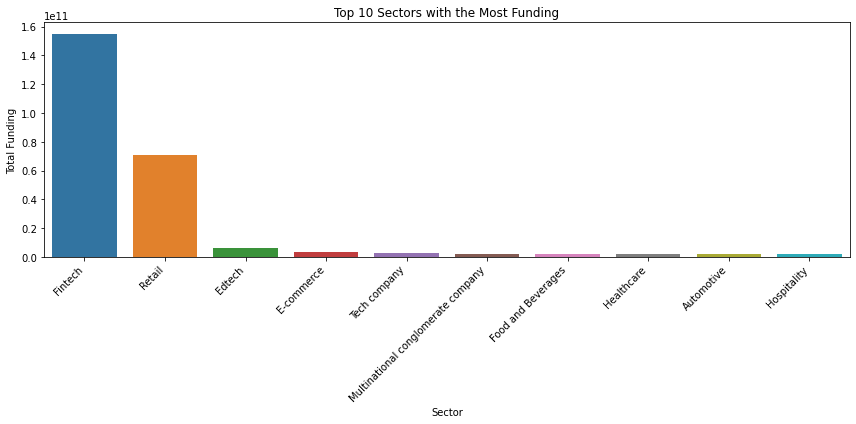

In [434]:
# Sort the sectors based on the total funding in descending order and select the top 10
top_10_sectors = sector_funding.sort_values(ascending=False).head(10)

# Plot the top 10 sectors with the most funding using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_sectors.index, y=top_10_sectors.values)
plt.xlabel('Sector')
plt.ylabel('Total Funding')
plt.title('Top 10 Sectors with the Most Funding')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This graph reveals the diverse industries attracting substantial investments, with Fintech leading the pack, reflecting the ongoing digital transformation across sectors.By this, entrepreneurs and business owners seeking funding for their ventures can use this information to identify sectors that are currently attracting significant investments.

3. What top 10 companies under highest ranking sector got the most funding?



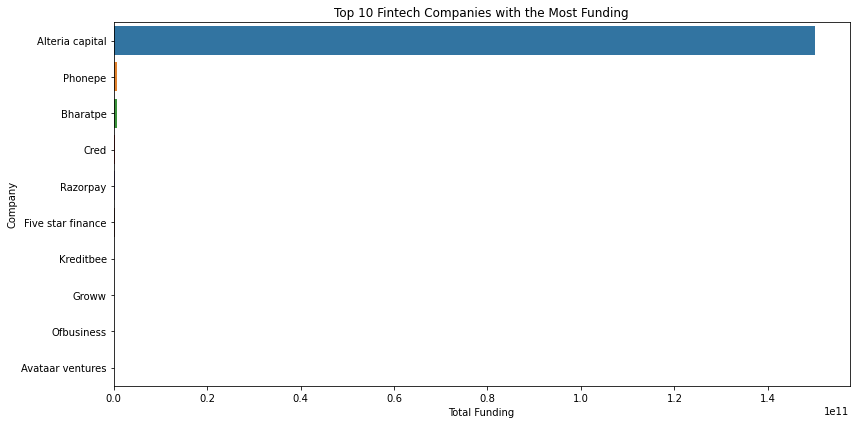

In [435]:
# Filter Data for Fintech Sector
fintech_data = complete_data[complete_data['Sector'] == 'Fintech']

# Group and Calculate the Funding for Each Company in Fintech
fintech_company_funding = fintech_data.groupby('Company/Brand')['Amount($)'].sum()

# Sort the Companies in Descending Order and Select Top 10
top_10_fintech_companies = fintech_company_funding.sort_values(ascending=False).head(10)

# Plot the Vertical Bar Graph
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_fintech_companies.values, y=top_10_fintech_companies.index)
plt.xlabel('Total Funding')
plt.ylabel('Company')
plt.title('Top 10 Fintech Companies with the Most Funding')
plt.tight_layout()
plt.show()

Here we see that Alteria capital which is a Fintech company which is a venture debt firm received the most funding in the period of $150000000000 with Avaatar ventures recieving $100000000 which is the least amount received by the top 10 companies in the Fintech sector. Overall, this data empowers entrepreneurs in the Fintech sector to make informed decisions, fine-tune their fundraising efforts, and align their ventures with market demands. By leveraging the insights gained from analyzing the top-funded companies, entrepreneurs can position themselves for success, attract investment, and drive innovation in the dynamic world of Fintech.

4. Does location affect the funding amount given to the top 10 sectors?

In [436]:
# Set the display option to show all rows without truncation
pd.set_option('display.max_rows', None)

# Get the value counts of entries in the 'Company/Brand' column
sector_counts = complete_data['Sector'].value_counts()

# Print the value counts
print(sector_counts)

# Reset the display option to the default value (to avoid affecting other outputs)
pd.reset_option('display.max_rows')

Fintech                                 348
Edtech                                  246
Healthcare                              166
E-commerce                              134
Food and Beverages                      100
Saas                                     81
AI                                       79
Agritech                                 68
Healthtech                               61
Financial services                       60
Logistics                                41
Gaming                                   40
Automotive                               36
Finance                                  36
Information technology & services        35
Hospitality                              32
Computer software                        31
Retail                                   28
Tech startup                             28
Media                                    27
Consumer goods                           25
E-learning                               24
Technology                      

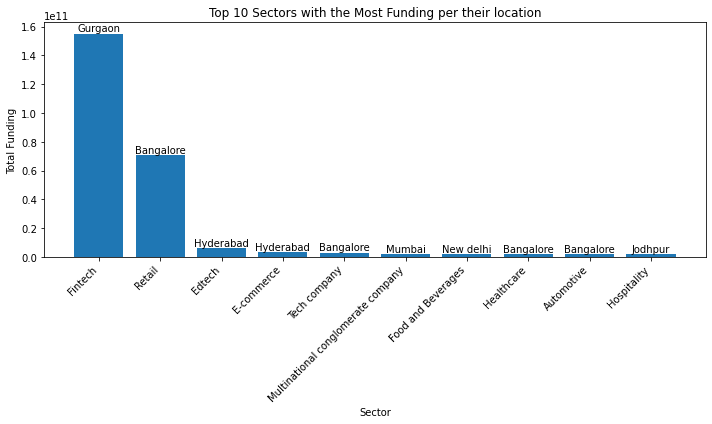

In [437]:

# Group the data by the 'Sector' column and calculate the sum of funding for each sector

sector_funding = complete_data.groupby('Sector').agg({'Amount($)': 'sum', 'HeadQuarter': 'first'})


# Sort the sectors based on the total funding in descending order

top_10_sectors = sector_funding.sort_values(by='Amount($)', ascending=False).head(10)


# Create a bar plot for the top 4 sectors with the most funding

plt.figure(figsize=(10, 6))

plt.bar(top_10_sectors.index, top_10_sectors['Amount($)'])

plt.xlabel('Sector')

plt.ylabel('Total Funding')

plt.title('Top 10 Sectors with the Most Funding per their location')

plt.xticks(rotation=45, ha='right')


# Annotate the headquarters on the plot

for index, row in top_10_sectors.iterrows():

    plt.text(index, row['Amount($)'], row['HeadQuarter'], ha='center', va='bottom')


plt.tight_layout()

plt.show()



From the graph above, companies Bangalore are most likely to receive funding irrespective of the the sector they operate in. The next city that realized funding was Hyderabad which had Edtech and E-commerce as the most funded in the sectors. However, Fintech received the most funding as a sector operated in Gurgaon city of India. 

5. Does the stage affect the amount of funding given?

In [438]:
# Group the data by 'Stage' and calculate the total funding for each Stage
Stage_funding = complete_data.groupby('Stage')['Amount($)'].sum()

# Sort the Stages based on total funding in descending order and select top 10
main_Stages = Stage_funding.sort_values(ascending=False).head(10)

main_Stages

Stage
Debt           1.511712e+11
None           8.349663e+10
Series D       1.533215e+10
Undisclosed    1.387425e+10
Series C       5.426679e+09
Series B       4.782518e+09
Series A       4.102898e+09
Seed           1.411954e+09
Pre-series     2.900000e+07
Name: Amount($), dtype: float64

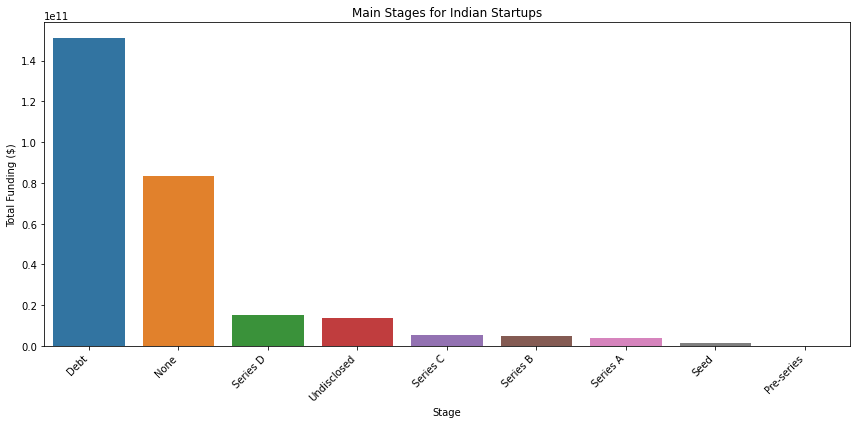

In [439]:
# Group the data by 'Stage' and calculate the total funding for each Stage
Stage_funding = complete_data.groupby('Stage')['Amount($)'].sum()

# Sort the Stages based on total funding in descending order and select top 10
main_Stages = Stage_funding.sort_values(ascending=False).head(10)

# Create a bar plot for the main Stages and their total funding using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=main_Stages.index, y=main_Stages.values)
plt.xlabel('Stage')
plt.ylabel('Total Funding ($)')
plt.title('Main Stages for Indian Startups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Funding Amounts by Investment Stage:

* Debt: The Debt stage stands out as the most well-funded investment category, with a substantial funding amount of $151,171,232,000. Debt funding refers to capital raised by companies through loans or other debt instruments, which they commit to repay with interest.

* None: Interestingly, there is a significant funding amount of $83,496,625,874 categorized under 'None.' This might represent cases where the stage of investment is not explicitly specified which is also seen because the data is incomplete.

* Series D: Among the venture capital stages, Series D funding ranks third, with a notable amount of $15,332,145,360. Series D funding typically occurs in mature companies looking to expand and further solidify their market position.

* Undisclosed: The 'Undisclosed' stage follows closely with $13,874,248,980 in funding. This category includes situations where companies do not disclose the specific investment stage publicly.

* Series C: Series C funding received $5,426,678,700, indicating continued investor interest in companies that have demonstrated growth and a scalable business model.

* Series B: Companies in the Series B stage secured $4,782,518,350, reflecting investors' confidence in these companies' potential for expansion and development.

* Series A: Series A funding amounted to $4,102,898,196, representing the initial significant round of funding for promising startups.

* Seed: The Seed stage, which marks the early funding phase for startups, accumulated $1,411,953,521 in investments.

* Pre-series: The Pre-series stage received the smallest funding amount of $29,000,000, as it represents the early fundraising phase before a formal series funding round.

This analysis allows entrepreneurs to understand the funding patterns at different stages of growth and it helps in strategically planning their fundraising efforts and aligning funding needs with investors' preferences at specific stages.

6. Who are the top investors?

In [440]:
# Let's filter for Indian startups and calculate the total funding for each investor
#indian_startups = complete_data[complete_data['Country'] == 'India']  # Assuming 'Country' column contains the country information
investor_funding = complete_data.groupby('Investor')['Amount($)'].sum()

# Sort the investors based on total funding in descending order
main_investors = investor_funding.sort_values(ascending=False)

# Print the main investors and their total funding
print("Main Investors for Indian Startups:")
print(main_investors)

Main Investors for Indian Startups:
Investor
Unknown                       1.513431e+11
Silver lake                   7.000000e+10
Nan                           6.641523e+09
Salesforce ventures           3.006700e+09
Tiger global                  2.356000e+09
                                  ...     
Kalyan krishnamurthy          0.000000e+00
Damien toledo                 0.000000e+00
Kapil dev                     0.000000e+00
Crossbeam venture partners    0.000000e+00
Leo capaitals                 0.000000e+00
Name: Amount($), Length: 1216, dtype: float64


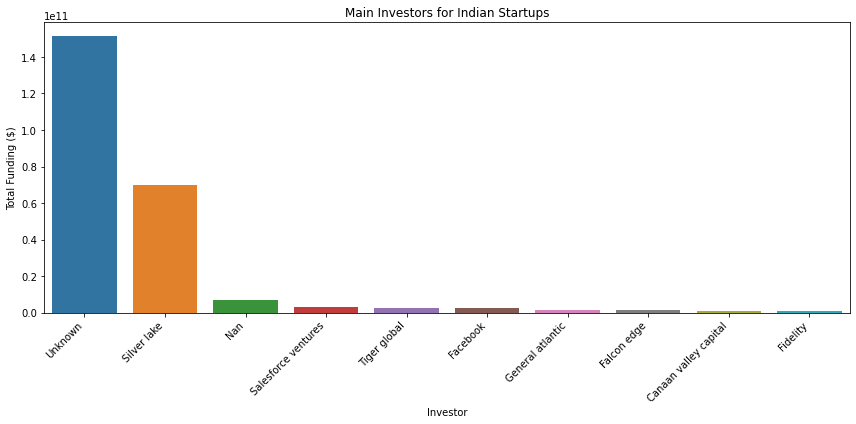

In [441]:
# Group the data by 'Investor' and calculate the total funding for each investor
investor_funding = complete_data.groupby('Investor')['Amount($)'].sum()

# Sort the investors based on total funding in descending order and select top 10
main_investors = investor_funding.sort_values(ascending=False).head(10)

# Create a bar plot for the main investors and their total funding using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=main_investors.index, y=main_investors.values)
plt.xlabel('Investor')
plt.ylabel('Total Funding ($)')
plt.title('Main Investors for Indian Startups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the graph above, "Unknown" emerges as the top investor with a substantial funding contribution of around $151.34 billion, indicating strong interest despite undisclosed identities. Following closely is "Silver Lake," a prominent venture capital firm, with an investment of $70 billion in technology-driven companies. Additionally, the "Nan" category represents significant funding of approximately $6.64 billion from undisclosed investors which could have also resulted from improper cleaning of our data or incomplete data used for analysis. Notable players like "Salesforce Ventures" and "Tiger Global" also make notable contributions, investing approximately $3.01 billion and $2.36 billion, respectively, in Indian startups, with potential impacts on innovation and market advancements.

7. What is the funding trend in the Indian startup ecosystem between 2018 to 2021

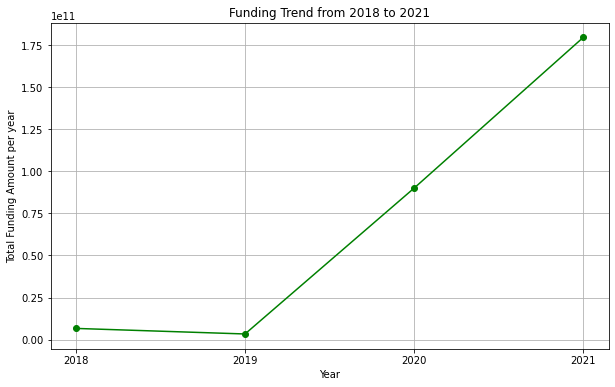

In [442]:
# Group the data by "Funding Year" and calculate the total funding amount for each year
funding_trend = complete_data.groupby(complete_data["Funded Year"])["Amount($)"].sum()

# Plot the funding trend over the years
plt.figure(figsize=(10, 6))
plt.plot(funding_trend.index, funding_trend.values, marker='o', linestyle='-', color='g')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount per year')
plt.title('Funding Trend from 2018 to 2021')
plt.xticks(funding_trend.index)
plt.grid(True)
plt.show()

 The funding given to startups in the Indian ecosystem has shown a consistent upward trend over the years. There was a slight reduction in funding from 2018 to 2019, followed by a significant and steady increase from 2019 to 2021.

The code below is to get the complete_data into a CSV file to allow us work on the powerbi deployment

In [443]:
# # Specify the file path where you want to save the CSV file

# output_file_path = "C:/Users/DOE EDINAM ABLA/Azubi_LP1/Azubi_Project_LP1.csv"

# # Save the DataFrame to a CSV file

# complete_data.to_csv(output_file_path, index=False)  uncoment later

### Hypothesis Testing

 Ho (Null hypo) : There is no significant association between the funding amount and the other factors such as sector,location, and the funding stage.

 

H1 (Alternate hypo) : There is a significant association between funding amount and other factors such as sector, location, and funding stage.

We used a One-Way ANOVA to test the association between a numerical outcome variable (funding amount) and a categorical predictor variables which are sector, location(headquarter) and funding stage.

In [444]:

# Rename the column "Amount($)" to "Amount"
complete_data = complete_data.rename(columns={"Amount($)": "Amount"})

# Perform ANOVA for "Sector" and "Amount" with "HeadQuarter" as an additional categorical variable
model = ols('Amount ~ C(Sector) + C(HeadQuarter)+ C(Stage)', data=complete_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Sector),2.936967e+20,446.0,0.056691,1.000000
C(HeadQuarter),1.430435e+20,121.0,0.101773,1.000000
C(Stage),4.692075e+20,8.0,5.049231,0.000003
Residual,2.657699e+22,2288.0,NaN,NaN


Interpretation:

The ANOVA results indicate that the "Stage" variable has a significant effect on the funding amount since it has a low p-value of 0.000003 (less than 0.05 significance level). This suggests that there is a significant association between the funding amount and the "Stage" variable.

On the other hand, the "Sector" and "HeadQuarter" variables do not have a significant effect on the funding amount, as their p-values are both 1.000000 (greater than 0.05 significance level).

Overall, based on the ANOVA results, we can safely reject the null hypothesis (H0) for the "Stage" variable and conclude that there is a significant association between the funding amount and the "Stage" variable. 
However, for the "Sector" and "HeadQuarter" variables, we fail to reject the null hypothesis, indicating that there is no significant association between the funding amount and these variables.

## Limitations
1. The accuracy and completeness of the data used for analysis can impact the reliability of the results. Incomplete or inaccurate data may lead to biased conclusions and limit the scope of the analysis.
2. The source of the data might have its limitations, and the accuracy of the information may vary, affecting the validity of the analysis.
3. The dataset used for analysis does not represent the entire population of Indian startups, potentially introducing selection bias
4. Sector categorization might be subjective and prone to misclassification. Different sources or methodologies for sector classification could yield different results.
5. Some relevant variables, such as company growth metrics,and market competitiveness, might not be included in the dataset. These factors can significantly influence funding decisions but were not accounted for in the analysis as they were not available in the dataset.



## Conclusion and Recommendation
Conclusion:

The analysis of funding patterns in the Indian startup ecosystem provides valuable insights for entrepreneurs and investors alike. The data indicates a positive trend of increasing funding over the years, with specific investors who are Unknown  and Silver Lake playing significant roles in supporting startups. However, there are still challenges represented by the "None" and "Nan" categories, which may require further investigation and data improvement efforts. 

Recommendations to Team:
1. Consider sectors like Fintech, Edtech and Retail when venturing into this ecosystems, however be mmindful of the competition in such sectors.
2. Conduct thorough market research to identify potential investors interested in your sector and offerings as the main investors are unkown to the public.
3. Tailor fundraising efforts based on the investment stage. Debt seems to be the main source of funding for startups in the Indian business ecosystem so due diligence to find out what stage suits growth phase 
4. Companies in cities such as Gurgaon, Bangalore, Hyderabad,Mumbai, NewDelhi and Jodhbur received quite significant funding within the period. In this cities except for Gurgaon, getting funded irrespective of Sector is highly attainable. 

Thanks for reading

#### Collaborators: 
Doe Edinam Abla

Kofi Asare Bamfo

Enoch Taylor-Nketiah

Timothy Morenikeji Akinremi

Philip Tolulope Oludipe

Godfrey Chilebe


